<a href="https://colab.research.google.com/github/lais-santiago/FIAP_Datathon/blob/main/tratamento_dados/Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Importação de bibliotecas e arquivos

In [5809]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import re
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from datetime import datetime

In [5810]:
file_path = './PEDE_2022.csv'
pd.set_option('display.max_columns', None)
df_2022 = pd.read_csv(file_path, delimiter=';')

In [5811]:
file_path = './PEDE_2023.csv'
pd.set_option('display.max_columns', None)
df_2023 = pd.read_csv(file_path, delimiter=';')

In [5812]:
file_path = './PEDE_2024.csv'
pd.set_option('display.max_columns', None)
df_2024 = pd.read_csv(file_path, delimiter=';')

In [5813]:
file_path = './PEDE_2022_old.csv'
pd.set_option('display.max_columns', None)
df_2022_old = pd.read_csv(file_path, delimiter=',')

#2) Funções reutilizáveis

In [5814]:
# Função para converter valores object para float
def converte_para_float(df, coluna):
  df[coluna] = df[coluna].replace({',': '.'}, regex=True)

  # Converte para float, valores inválidos viram NaN
  df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

  # Substitui NaN por 0
  df[coluna] = df[coluna].fillna(0)

  return df

In [5815]:
# Função para calcular a idade a partir da data de nascimento e data de referencia
def calcular_idade(data_nascimento, data_referencia):
    idade = data_referencia.year - data_nascimento.year - ((data_referencia.month, data_referencia.day) < (data_nascimento.month, data_nascimento.day))
    return idade

#3) Levantamento das colunas que compõem os dataframes

In [5816]:
list(df_2022.columns)

['RA',
 'Fase',
 'Turma',
 'Nome',
 'Ano nasc',
 'Idade 22',
 'Gênero',
 'Ano ingresso',
 'Instituição de ensino',
 'Pedra 20',
 'Pedra 21',
 'Pedra 22',
 'INDE 22',
 'Cg',
 'Cf',
 'Ct',
 'Nº Av',
 'Avaliador1',
 'Rec Av1',
 'Avaliador2',
 'Rec Av2',
 'Avaliador3',
 'Rec Av3',
 'Avaliador4',
 'Rec Av4',
 'IAA',
 'IEG',
 'IPS',
 'Rec Psicologia',
 'IDA',
 'Matem',
 'Portug',
 'Inglês',
 'Indicado',
 'Atingiu PV',
 'IPV',
 'IAN',
 'Fase ideal',
 'Defas',
 'Destaque IEG',
 'Destaque IDA',
 'Destaque IPV']

In [5817]:
list(df_2023.columns)

['RA',
 'Fase',
 'INDE 2023',
 'Pedra 2023',
 'Turma',
 'Nome Anonimizado',
 'Data de Nasc',
 'Idade',
 'Gênero',
 'Ano ingresso',
 'Instituição de ensino',
 'Pedra 20',
 'Pedra 21',
 'Pedra 22',
 'Pedra 23',
 'INDE 22',
 'INDE 23',
 'Cg',
 'Cf',
 'Ct',
 'Nº Av',
 'Avaliador1',
 'Rec Av1',
 'Avaliador2',
 'Rec Av2',
 'Avaliador3',
 'Rec Av3',
 'Avaliador4',
 'Rec Av4',
 'IAA',
 'IEG',
 'IPS',
 'IPP',
 'Rec Psicologia',
 'IDA',
 'Mat',
 'Por',
 'Ing',
 'Indicado',
 'Atingiu PV',
 'IPV',
 'IAN',
 'Fase Ideal',
 'Defasagem',
 'Destaque IEG',
 'Destaque IDA',
 'Destaque IPV',
 'Destaque IPV.1']

In [5818]:
list(df_2024.columns)

['RA',
 'Fase',
 'INDE 2024',
 'Pedra 2024',
 'Turma',
 'Nome Anonimizado',
 'Data de Nasc',
 'Idade',
 'Gênero',
 'Ano ingresso',
 'Instituição de ensino',
 'Pedra 20',
 'Pedra 21',
 'Pedra 22',
 'Pedra 23',
 'INDE 22',
 'INDE 23',
 'Cg',
 'Cf',
 'Ct',
 'Nº Av',
 'Avaliador1',
 'Rec Av1',
 'Avaliador2',
 'Rec Av2',
 'Avaliador3',
 'Avaliador4',
 'Avaliador5',
 'Avaliador6',
 'IAA',
 'IEG',
 'IPS',
 'IPP',
 'Rec Psicologia',
 'IDA',
 'Mat',
 'Por',
 'Ing',
 'Indicado',
 'Atingiu PV',
 'IPV',
 'IAN',
 'Fase Ideal',
 'Defasagem',
 'Destaque IEG',
 'Destaque IDA',
 'Destaque IPV',
 'Escola',
 'Ativo/ Inativo',
 'Ativo/ Inativo.1']

Algumas colunas existem em alguns dataframes e outros não.

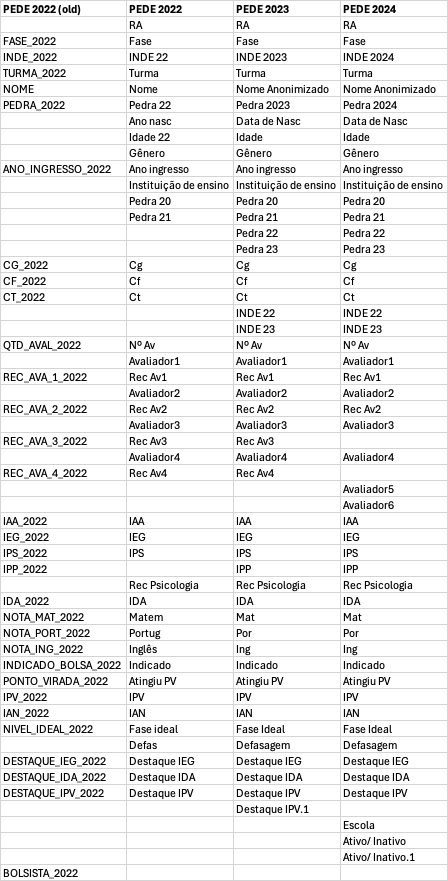

#4) Tratamento dos dados do Dataframe 2022

*   Remoção de linhas duplicadas
*   Remoção de linhas com valores NA
*   Incorporação da coluna IPP baseada no dataframe df_2022_old
*   Padronização dos nomes de colunas em snake_case
*   Ajuste nos tipos de colunas



In [5819]:
df_2022.shape

(861, 42)

In [5820]:
#Remove linhas duplicadas
df_2022 = df_2022.drop_duplicates()
df_2022_old = df_2022_old.drop_duplicates()

In [5821]:
# Remove qualquer linha que tenha pelo menos um valor NA
df_2022 = df_2022.dropna(how='all')
df_2022_old = df_2022_old.dropna(how='all')

In [5822]:
df_2022.shape

(860, 42)

In [5823]:
#Renomeando a coluna CG_2022 para CG no dataframe df_2022_old
df_2022_old = df_2022_old.rename(columns={'CG_2022': 'CG'})

In [5824]:
df_2022_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOME                 862 non-null    object 
 1   FASE_2022            862 non-null    float64
 2   TURMA_2022           862 non-null    object 
 3   ANO_INGRESSO_2022    862 non-null    float64
 4   BOLSISTA_2022        862 non-null    object 
 5   INDE_2022            862 non-null    float64
 6   CG                   862 non-null    float64
 7   CF_2022              862 non-null    float64
 8   CT_2022              862 non-null    float64
 9   PEDRA_2022           862 non-null    object 
 10  DESTAQUE_IEG_2022    862 non-null    object 
 11  DESTAQUE_IDA_2022    862 non-null    object 
 12  DESTAQUE_IPV_2022    862 non-null    object 
 13  IAA_2022             862 non-null    float64
 14  IEG_2022             862 non-null    float64
 15  IPS_2022             862 non-null    flo

In [5825]:
df_2022_old.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
1,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
2,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
3,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
4,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)


In [5826]:
#Convertendo a coluna 'CG' em inteiro
df_2022_old['CG'] = df_2022_old['CG'].astype(int)

In [5827]:
df_2022_old.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,ALUNO-2,0.0,K,2022.0,Não,7.675509,245,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
1,ALUNO-4,2.0,J,2022.0,Não,7.117065,451,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
2,ALUNO-5,2.0,L,2019.0,Não,7.232336,415,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
3,ALUNO-6,2.0,K,2022.0,Não,7.741669,221,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
4,ALUNO-7,1.0,U,2022.0,Não,7.406743,357,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)


In [5828]:
#Renomeando a coluna Cg para CG no dataframe df_2022
df_2022 = df_2022.rename(columns={'Cg': 'CG'})

In [5829]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 860 entries, 0 to 859
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RA                     860 non-null    object 
 1   Fase                   860 non-null    float64
 2   Turma                  860 non-null    object 
 3   Nome                   860 non-null    object 
 4   Ano nasc               860 non-null    float64
 5   Idade 22               860 non-null    float64
 6   Gênero                 860 non-null    object 
 7   Ano ingresso           860 non-null    float64
 8   Instituição de ensino  860 non-null    object 
 9   Pedra 20               323 non-null    object 
 10  Pedra 21               462 non-null    object 
 11  Pedra 22               860 non-null    object 
 12  INDE 22                860 non-null    object 
 13  CG                     860 non-null    object 
 14  Cf                     860 non-null    float64
 15  Ct         

In [5830]:
df_2022.head()

,RA,Fase,Turma,Nome,Ano nasc,Idade 22,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,INDE 22,CG,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,Rec Psicologia,IDA,Matem,Portug,Inglês,Indicado,Atingiu PV,IPV,IAN,Fase ideal,Defas,Destaque IEG,Destaque IDA,Destaque IPV
0,RA-1,7.0,A,Aluno-1,2003.0,19.0,Menina,2016.0,Escola Pública,Ametista,Ametista,Quartzo,"5,783","753,000",18.0,10.0,4.0,Avaliador-5,Mantido na Fase atual,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Mantido na Fase atual,"8,3","4,1","5,6",Requer avaliação,"4,0","2,7","3,5","6,0",Sim,Não,"7,278","5,000",Fase 8 (Universitários),-1.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7.0,A,Aluno-2,2005.0,17.0,Menina,2017.0,Rede Decisão,Ametista,Ametista,Ametista,"7,055","469,000",8.0,3.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,"8,8","5,2","6,3",Sem limitações,"6,8","6,3","4,5","9,7",Não,Não,"6,778","10,000",Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
2,RA-3,7.0,A,Aluno-3,2005.0,17.0,Menina,2016.0,Rede Decisão,Ametista,Ametista,Ágata,"6,591","629,000",13.0,6.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,"0,0","7,9","5,6",Sem limitações,"5,6","5,8","4,0","6,9",Não,Não,"7,556","10,000",Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...
3,RA-4,7.0,A,Aluno-4,2005.0,17.0,Menino,2017.0,Rede Decisão,Ametista,Ametista,Quartzo,"5,951","731,000",15.0,7.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Mantido na Fase atual,Avaliador-28,Mantido na Fase atual,Avaliador-31,Mantido na Fase atual,"8,8","4,5","5,6",Requer avaliação,"5,0","2,8","3,5","8,7",Não,Não,"5,278","10,000",Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
4,RA-5,7.0,A,Aluno-5,2005.0,17.0,Menina,2016.0,Rede Decisão,Ametista,Ametista,Ametista,"7,427","344,000",6.0,2.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,"7,9","8,6","5,6",Requer avaliação,"5,2","7,0","2,9","5,7",Não,Não,"7,389","10,000",Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...


In [5831]:
df_2022['CG'] = df_2022['CG'].str.replace(',000', '', regex=False).astype(int)

In [5832]:
df_2022.head()

,RA,Fase,Turma,Nome,Ano nasc,Idade 22,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,INDE 22,CG,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,Rec Psicologia,IDA,Matem,Portug,Inglês,Indicado,Atingiu PV,IPV,IAN,Fase ideal,Defas,Destaque IEG,Destaque IDA,Destaque IPV
0,RA-1,7.0,A,Aluno-1,2003.0,19.0,Menina,2016.0,Escola Pública,Ametista,Ametista,Quartzo,"5,783",753,18.0,10.0,4.0,Avaliador-5,Mantido na Fase atual,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Mantido na Fase atual,"8,3","4,1","5,6",Requer avaliação,"4,0","2,7","3,5","6,0",Sim,Não,"7,278","5,000",Fase 8 (Universitários),-1.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7.0,A,Aluno-2,2005.0,17.0,Menina,2017.0,Rede Decisão,Ametista,Ametista,Ametista,"7,055",469,8.0,3.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,"8,8","5,2","6,3",Sem limitações,"6,8","6,3","4,5","9,7",Não,Não,"6,778","10,000",Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
2,RA-3,7.0,A,Aluno-3,2005.0,17.0,Menina,2016.0,Rede Decisão,Ametista,Ametista,Ágata,"6,591",629,13.0,6.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,"0,0","7,9","5,6",Sem limitações,"5,6","5,8","4,0","6,9",Não,Não,"7,556","10,000",Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...
3,RA-4,7.0,A,Aluno-4,2005.0,17.0,Menino,2017.0,Rede Decisão,Ametista,Ametista,Quartzo,"5,951",731,15.0,7.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Mantido na Fase atual,Avaliador-28,Mantido na Fase atual,Avaliador-31,Mantido na Fase atual,"8,8","4,5","5,6",Requer avaliação,"5,0","2,8","3,5","8,7",Não,Não,"5,278","10,000",Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
4,RA-5,7.0,A,Aluno-5,2005.0,17.0,Menina,2016.0,Rede Decisão,Ametista,Ametista,Ametista,"7,427",344,6.0,2.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,"7,9","8,6","5,6",Requer avaliação,"5,2","7,0","2,9","5,7",Não,Não,"7,389","10,000",Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...


In [5833]:
#Incorporando os valores da coluna IPP_2022 do dataframe df_2022_old na nova coluna IPP do dataframe df_2022, baseado na coluna chave CG usando a funçào merge
df_2022 = pd.merge(df_2022, df_2022_old[['CG', 'IPP_2022']], on='CG', how='left')
df_2022.head()


,RA,Fase,Turma,Nome,Ano nasc,Idade 22,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,Pedra 22,INDE 22,CG,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,IAA,IEG,IPS,Rec Psicologia,IDA,Matem,Portug,Inglês,Indicado,Atingiu PV,IPV,IAN,Fase ideal,Defas,Destaque IEG,Destaque IDA,Destaque IPV,IPP_2022
0,RA-1,7.0,A,Aluno-1,2003.0,19.0,Menina,2016.0,Escola Pública,Ametista,Ametista,Quartzo,"5,783",753,18.0,10.0,4.0,Avaliador-5,Mantido na Fase atual,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Mantido na Fase atual,"8,3","4,1","5,6",Requer avaliação,"4,0","2,7","3,5","6,0",Sim,Não,"7,278","5,000",Fase 8 (Universitários),-1.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.96875
1,RA-2,7.0,A,Aluno-2,2005.0,17.0,Menina,2017.0,Rede Decisão,Ametista,Ametista,Ametista,"7,055",469,8.0,3.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,"8,8","5,2","6,3",Sem limitações,"6,8","6,3","4,5","9,7",Não,Não,"6,778","10,000",Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.81250
2,RA-3,7.0,A,Aluno-3,2005.0,17.0,Menina,2016.0,Rede Decisão,Ametista,Ametista,Ágata,"6,591",629,13.0,6.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,"0,0","7,9","5,6",Sem limitações,"5,6","5,8","4,0","6,9",Não,Não,"7,556","10,000",Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,8.12500
3,RA-4,7.0,A,Aluno-4,2005.0,17.0,Menino,2017.0,Rede Decisão,Ametista,Ametista,Quartzo,"5,951",731,15.0,7.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Mantido na Fase atual,Avaliador-28,Mantido na Fase atual,Avaliador-31,Mantido na Fase atual,"8,8","4,5","5,6",Requer avaliação,"5,0","2,8","3,5","8,7",Não,Não,"5,278","10,000",Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,5.62500
4,RA-5,7.0,A,Aluno-5,2005.0,17.0,Menina,2016.0,Rede Decisão,Ametista,Ametista,Ametista,"7,427",344,6.0,2.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,"7,9","8,6","5,6",Requer avaliação,"5,2","7,0","2,9","5,7",Não,Não,"7,389","10,000",Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.28125


In [5834]:
df_2022.columns

Index(['RA', 'Fase', 'Turma', 'Nome', 'Ano nasc', 'Idade 22', 'Gênero',
       'Ano ingresso', 'Instituição de ensino', 'Pedra 20', 'Pedra 21',
       'Pedra 22', 'INDE 22', 'CG', 'Cf', 'Ct', 'Nº Av', 'Avaliador1',
       'Rec Av1', 'Avaliador2', 'Rec Av2', 'Avaliador3', 'Rec Av3',
       'Avaliador4', 'Rec Av4', 'IAA', 'IEG', 'IPS', 'Rec Psicologia', 'IDA',
       'Matem', 'Portug', 'Inglês', 'Indicado', 'Atingiu PV', 'IPV', 'IAN',
       'Fase ideal', 'Defas', 'Destaque IEG', 'Destaque IDA', 'Destaque IPV',
       'IPP_2022'],
      dtype='object')

In [5835]:
#Renomeando as colunas
df_2022 = df_2022.rename(columns={'RA': 'ra',
                                  'Fase': 'fase',
                                  'Turma': 'turma',
                                  'Nome': 'nome',
                                  'Ano nasc': 'ano_nascimento',
                                  'Idade 22': 'idade',
                                  'Gênero': 'genero',
                                  'Ano ingresso': 'ano_ingresso',
                                  'Instituição de ensino': 'instituicao_ensino',
                                  'Pedra 20': 'pedra_2020',
                                  'Pedra 21': 'pedra_2021',
                                  'Pedra 22': 'pedra',
                                  'INDE 22': 'inde',
                                  'CG': 'classificacao_geral',
                                  'Cf': 'classificacao_fase',
                                  'Ct': 'classificacao_turma',
                                  'Nº Av': 'quantidade_avaliadores',
                                  'Avaliador1': 'avaliador_1',
                                  'Rec Av1': 'recomendacao_avaliador_1',
                                  'Avaliador2': 'avaliador_2',
                                  'Rec Av2': 'recomendacao_avaliador_2',
                                  'Avaliador3': 'avaliador_3',
                                  'Rec Av3': 'recomendacao_avaliador_3',
                                  'Avaliador4': 'avaliador_4',
                                  'Rec Av4': 'recomendacao_avaliador_4',
                                  'IAA': 'iaa',
                                  'IEG': 'ieg',
                                  'IPS': 'ips',
                                  'Rec Psicologia': 'recomendacao_psicologia',
                                  'IDA': 'ida',
                                  'Matem': 'nota_matematica',
                                  'Portug': 'nota_portugues',
                                  'Inglês': 'nota_ingles',
                                  'Indicado': 'indicado_bolsa',
                                  'Atingiu PV': 'atingiu_ponto_virada',
                                  'IPV': 'ipv',
                                  'IAN': 'ian',
                                  'Fase ideal': 'fase_ideal',
                                  'Defas': 'defasagem',
                                  'Destaque IEG': 'destaque_ieg',
                                  'Destaque IDA': 'destaque_ida',
                                  'Destaque IPV': 'destaque_ipv',
                                  'IPP_2022': 'ipp'})

In [5836]:
df_2022.columns

Index(['ra', 'fase', 'turma', 'nome', 'ano_nascimento', 'idade', 'genero',
       'ano_ingresso', 'instituicao_ensino', 'pedra_2020', 'pedra_2021',
       'pedra', 'inde', 'classificacao_geral', 'classificacao_fase',
       'classificacao_turma', 'quantidade_avaliadores', 'avaliador_1',
       'recomendacao_avaliador_1', 'avaliador_2', 'recomendacao_avaliador_2',
       'avaliador_3', 'recomendacao_avaliador_3', 'avaliador_4',
       'recomendacao_avaliador_4', 'iaa', 'ieg', 'ips',
       'recomendacao_psicologia', 'ida', 'nota_matematica', 'nota_portugues',
       'nota_ingles', 'indicado_bolsa', 'atingiu_ponto_virada', 'ipv', 'ian',
       'fase_ideal', 'defasagem', 'destaque_ieg', 'destaque_ida',
       'destaque_ipv', 'ipp'],
      dtype='object')

In [5837]:
df_2022.head(2)

,ra,fase,turma,nome,ano_nascimento,idade,genero,ano_ingresso,instituicao_ensino,pedra_2020,pedra_2021,pedra,inde,classificacao_geral,classificacao_fase,classificacao_turma,quantidade_avaliadores,avaliador_1,recomendacao_avaliador_1,avaliador_2,recomendacao_avaliador_2,avaliador_3,recomendacao_avaliador_3,avaliador_4,recomendacao_avaliador_4,iaa,ieg,ips,recomendacao_psicologia,ida,nota_matematica,nota_portugues,nota_ingles,indicado_bolsa,atingiu_ponto_virada,ipv,ian,fase_ideal,defasagem,destaque_ieg,destaque_ida,destaque_ipv,ipp
0,RA-1,7.0,A,Aluno-1,2003.0,19.0,Menina,2016.0,Escola Pública,Ametista,Ametista,Quartzo,"5,783",753,18.0,10.0,4.0,Avaliador-5,Mantido na Fase atual,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Mantido na Fase atual,"8,3","4,1","5,6",Requer avaliação,"4,0","2,7","3,5","6,0",Sim,Não,"7,278","5,000",Fase 8 (Universitários),-1.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.96875
1,RA-2,7.0,A,Aluno-2,2005.0,17.0,Menina,2017.0,Rede Decisão,Ametista,Ametista,Ametista,"7,055",469,8.0,3.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,"8,8","5,2","6,3",Sem limitações,"6,8","6,3","4,5","9,7",Não,Não,"6,778","10,000",Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.81250


In [5838]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ra                        860 non-null    object 
 1   fase                      860 non-null    float64
 2   turma                     860 non-null    object 
 3   nome                      860 non-null    object 
 4   ano_nascimento            860 non-null    float64
 5   idade                     860 non-null    float64
 6   genero                    860 non-null    object 
 7   ano_ingresso              860 non-null    float64
 8   instituicao_ensino        860 non-null    object 
 9   pedra_2020                323 non-null    object 
 10  pedra_2021                462 non-null    object 
 11  pedra                     860 non-null    object 
 12  inde                      860 non-null    object 
 13  classificacao_geral       860 non-null    int64  
 14  classifica

In [5742]:
df_2022['fase'].unique()

array([7., 6., 5., 4., 3., 2., 1., 0.])

In [5743]:
df_2022['turma'].unique()

array(['A', 'D', 'B', 'C', 'F', 'K', 'L', 'H', 'P', 'E', 'G', 'I', 'M',
       'N', 'J', 'Q', 'U', 'R', 'O', 'S', 'T', 'V', 'Y', 'Z'],
      dtype=object)

In [5744]:
df_2022['fase'] = df_2022['fase'].astype(int)
df_2022['ano_nascimento'] = df_2022['ano_nascimento'].astype(int)
df_2022['idade'] = df_2022['idade'].astype(int)
df_2022['ano_ingresso'] = df_2022['ano_ingresso'].astype(int)
df_2022['classificacao_fase'] = df_2022['classificacao_fase'].astype(int)
df_2022['classificacao_turma'] = df_2022['classificacao_turma'].astype(int)
df_2022['quantidade_avaliadores'] = df_2022['quantidade_avaliadores'].astype(int)

In [5745]:
df_2022 = converte_para_float(df_2022, 'inde')
df_2022 = converte_para_float(df_2022, 'iaa')
df_2022 = converte_para_float(df_2022, 'ieg')
df_2022 = converte_para_float(df_2022, 'ips')
df_2022 = converte_para_float(df_2022, 'ida')
df_2022 = converte_para_float(df_2022, 'nota_matematica')
df_2022 = converte_para_float(df_2022, 'nota_portugues')
df_2022 = converte_para_float(df_2022, 'nota_ingles')
df_2022 = converte_para_float(df_2022, 'ipv')
df_2022 = converte_para_float(df_2022, 'ian')

In [5746]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ra                        860 non-null    object 
 1   fase                      860 non-null    int64  
 2   turma                     860 non-null    object 
 3   nome                      860 non-null    object 
 4   ano_nascimento            860 non-null    int64  
 5   idade                     860 non-null    int64  
 6   genero                    860 non-null    object 
 7   ano_ingresso              860 non-null    int64  
 8   instituicao_ensino        860 non-null    object 
 9   pedra_2020                323 non-null    object 
 10  pedra_2021                462 non-null    object 
 11  pedra                     860 non-null    object 
 12  inde                      860 non-null    float64
 13  classificacao_geral       860 non-null    int64  
 14  classifica

In [5747]:
#Adicao da coluna ano com conteúdo fixo '2022''
df_2022['ano'] = 2022

In [5748]:
df_2022.head()

,ra,fase,turma,nome,ano_nascimento,idade,genero,ano_ingresso,instituicao_ensino,pedra_2020,pedra_2021,pedra,inde,classificacao_geral,classificacao_fase,classificacao_turma,quantidade_avaliadores,avaliador_1,recomendacao_avaliador_1,avaliador_2,recomendacao_avaliador_2,avaliador_3,recomendacao_avaliador_3,avaliador_4,recomendacao_avaliador_4,iaa,ieg,ips,recomendacao_psicologia,ida,nota_matematica,nota_portugues,nota_ingles,indicado_bolsa,atingiu_ponto_virada,ipv,ian,fase_ideal,defasagem,destaque_ieg,destaque_ida,destaque_ipv,ipp,ano
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,Ametista,Quartzo,5.783,753,18,10,4,Avaliador-5,Mantido na Fase atual,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Mantido na Fase atual,8.3,4.1,5.6,Requer avaliação,4.0,2.7,3.5,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.96875,2022
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,Ametista,Ametista,7.055,469,8,3,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,8.8,5.2,6.3,Sem limitações,6.8,6.3,4.5,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.81250,2022
2,RA-3,7,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,Ametista,Ametista,Ágata,6.591,629,13,6,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,0.0,7.9,5.6,Sem limitações,5.6,5.8,4.0,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,8.12500,2022
3,RA-4,7,A,Aluno-4,2005,17,Menino,2017,Rede Decisão,Ametista,Ametista,Quartzo,5.951,731,15,7,4,Avaliador-5,Promovido de Fase,Avaliador-27,Mantido na Fase atual,Avaliador-28,Mantido na Fase atual,Avaliador-31,Mantido na Fase atual,8.8,4.5,5.6,Requer avaliação,5.0,2.8,3.5,8.7,Não,Não,5.278,10.0,Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,5.62500,2022
4,RA-5,7,A,Aluno-5,2005,17,Menina,2016,Rede Decisão,Ametista,Ametista,Ametista,7.427,344,6,2,4,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,7.9,8.6,5.6,Requer avaliação,5.2,7.0,2.9,5.7,Não,Não,7.389,10.0,Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.28125,2022


#5) Tratamento dos dados do Dataframe 2023

*   Remoção de linhas duplicadas
*   Remoção de linhas com valores NA
*   Padronização dos nomes de colunas em snake_case
*   Ajuste nos tipos de colunas

In [5749]:
df_2023.shape

(1014, 48)

In [5750]:
# Remove linhas duplicadas
df_2023 = df_2023.drop_duplicates()

In [5751]:
# Remove qualquer linha que tenha pelo menos um valor NA
df_2023 = df_2023.dropna(how='all')

In [5752]:
df_2023.shape

(1014, 48)

In [5753]:
df_2023.columns

Index(['RA', 'Fase', 'INDE 2023', 'Pedra 2023', 'Turma', 'Nome Anonimizado',
       'Data de Nasc', 'Idade', 'Gênero', 'Ano ingresso',
       'Instituição de ensino', 'Pedra 20', 'Pedra 21', 'Pedra 22', 'Pedra 23',
       'INDE 22', 'INDE 23', 'Cg', 'Cf', 'Ct', 'Nº Av', 'Avaliador1',
       'Rec Av1', 'Avaliador2', 'Rec Av2', 'Avaliador3', 'Rec Av3',
       'Avaliador4', 'Rec Av4', 'IAA', 'IEG', 'IPS', 'IPP', 'Rec Psicologia',
       'IDA', 'Mat', 'Por', 'Ing', 'Indicado', 'Atingiu PV', 'IPV', 'IAN',
       'Fase Ideal', 'Defasagem', 'Destaque IEG', 'Destaque IDA',
       'Destaque IPV', 'Destaque IPV.1'],
      dtype='object')

In [5754]:
#Renomeando as colunas
df_2023 = df_2023.rename(columns={'RA': 'ra',
                                  'Fase': 'fase',
                                  'INDE 2023': 'inde',
                                  'Pedra 2023': 'pedra',
                                  'Turma': 'turma',
                                  'Nome Anonimizado': 'nome',
                                  'Data de Nasc': 'data_nascimento',
                                  'Idade': 'idade',
                                  'Gênero': 'genero',
                                  'Ano ingresso': 'ano_ingresso',
                                  'Instituição de ensino': 'instituicao_ensino',
                                  'Pedra 20': 'pedra_2020',
                                  'Pedra 21': 'pedra_2021',
                                  'Pedra 22': 'pedra_2022',
                                  'Pedra 23': 'pedra_2023',
                                  'INDE 22': 'inde_2022',
                                  'INDE 23': 'inde_2023',
                                  'Cg': 'classificacao_geral',
                                  'Cf': 'classificacao_fase',
                                  'Ct': 'classificacao_turma',
                                  'Nº Av': 'quantidade_avaliadores',
                                  'Avaliador1': 'avaliador_1',
                                  'Rec Av1': 'recomendacao_avaliador_1',
                                  'Avaliador2': 'avaliador_2',
                                  'Rec Av2': 'recomendacao_avaliador_2',
                                  'Avaliador3': 'avaliador_3',
                                  'Rec Av3': 'recomendacao_avaliador_3',
                                  'Avaliador4': 'avaliador_4',
                                  'Rec Av4': 'recomendacao_avaliador_4',
                                  'IAA': 'iaa',
                                  'IEG': 'ieg',
                                  'IPS': 'ips',
                                  'IPP': 'ipp',
                                  'Rec Psicologia': 'recomendacao_psicologia',
                                  'IDA': 'ida',
                                  'Mat': 'nota_matematica',
                                  'Por': 'nota_portugues',
                                  'Ing': 'nota_ingles',
                                  'Indicado': 'indicado_bolsa',
                                  'Atingiu PV': 'atingiu_ponto_virada',
                                  'IPV': 'ipv',
                                  'IAN': 'ian',
                                  'Fase Ideal': 'fase_ideal',
                                  'Defasagem': 'defasagem',
                                  'Destaque IEG': 'destaque_ieg',
                                  'Destaque IDA': 'destaque_ida',
                                  'Destaque IPV': 'destaque_ipv',
                                  'Destaque IPV.1': 'destaque_ipv_1'})

In [5755]:
df_2023.columns

Index(['ra', 'fase', 'inde', 'pedra', 'turma', 'nome', 'data_nascimento',
       'idade', 'genero', 'ano_ingresso', 'instituicao_ensino', 'pedra_2020',
       'pedra_2021', 'pedra_2022', 'pedra_2023', 'inde_2022', 'inde_2023',
       'classificacao_geral', 'classificacao_fase', 'classificacao_turma',
       'quantidade_avaliadores', 'avaliador_1', 'recomendacao_avaliador_1',
       'avaliador_2', 'recomendacao_avaliador_2', 'avaliador_3',
       'recomendacao_avaliador_3', 'avaliador_4', 'recomendacao_avaliador_4',
       'iaa', 'ieg', 'ips', 'ipp', 'recomendacao_psicologia', 'ida',
       'nota_matematica', 'nota_portugues', 'nota_ingles', 'indicado_bolsa',
       'atingiu_ponto_virada', 'ipv', 'ian', 'fase_ideal', 'defasagem',
       'destaque_ieg', 'destaque_ida', 'destaque_ipv', 'destaque_ipv_1'],
      dtype='object')

In [5756]:
df_2023['fase'].unique()

array(['ALFA', 'FASE 1', 'FASE 2', 'FASE 3', 'FASE 4', 'FASE 5', 'FASE 6',
       'FASE 7', 'FASE 8'], dtype=object)

In [5757]:
df_2023['fase'] = df_2023['fase'].map({'ALFA': 0, 'FASE 1': 1, 'FASE 2': 2, 'FASE 3': 3, 'FASE 4': 4, 'FASE 5': 5, 'FASE 6': 6, 'FASE 7': 7, 'FASE 8': 8})


In [5758]:
df_2023['turma'].unique()

array(['ALFA A - G0/G1', 'ALFA B - G2/G3', 'ALFA C - G0/G1',
       'ALFA D - G2/G3', 'ALFA E - G2/G3', 'ALFA F - G0/G1',
       'ALFA G - G2/G3', 'ALFA H - G0/G1', 'ALFA I - G2/G3',
       'ALFA J - G2/G3', 'ALFA K - G0/G1', 'ALFA L - G2/G3',
       'ALFA M - G0/G1', 'ALFA N - G2/G3', 'ALFA O - G2/G3',
       'ALFA Q - G2/G3', 'ALFA R - G0/G1', 'ALFA S - G2/G3',
       'ALFA T - G2/G3', 'ALFA U - G2/G3', 'ALFA V - G0/G1',
       'ALFA Y - G0/G1', '1A', '1B', '1C', '1D', '1F', '1G', '1H', '1J',
       '1K', '1L', '1M', '1N', '1P', '1R', '2A', '2B', '2C', '2D', '2F',
       '2G', '2H', '2I', '2K', '2L', '2M', '2N', '2P', '2R', '2U', '3A',
       '3B', '3C', '3D', '3F', '3G', '3I', '3K', '3L', '3M', '3N', '3P',
       '4A', '4B', '4C', '4F', '4G', '4H', '4L', '4M', '4N', '5A', '5B',
       '5C', '5F', '5L', '5M', '6A', '6L', '7A', '7E', '8A', '8B', '8D',
       '8E'], dtype=object)

In [5759]:
df_2023['turma'] = df_2023['turma'].str.replace(r'.*([A-Za-z])\s.*', r'\1', regex=True)

In [5760]:
df_2023['turma'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'Q', 'R', 'S', 'T', 'U', 'V', 'Y', '1A', '1B', '1C',
       '1D', '1F', '1G', '1H', '1J', '1K', '1L', '1M', '1N', '1P', '1R',
       '2A', '2B', '2C', '2D', '2F', '2G', '2H', '2I', '2K', '2L', '2M',
       '2N', '2P', '2R', '2U', '3A', '3B', '3C', '3D', '3F', '3G', '3I',
       '3K', '3L', '3M', '3N', '3P', '4A', '4B', '4C', '4F', '4G', '4H',
       '4L', '4M', '4N', '5A', '5B', '5C', '5F', '5L', '5M', '6A', '6L',
       '7A', '7E', '8A', '8B', '8D', '8E'], dtype=object)

In [5761]:
df_2023['turma'] = df_2023['turma'].str.replace(r'^\d([A-Za-z])', r'\1', regex=True)

In [5762]:
df_2023['turma'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'Q', 'R', 'S', 'T', 'U', 'V', 'Y', 'P'], dtype=object)

In [5763]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ra                        1014 non-null   object 
 1   fase                      1014 non-null   int64  
 2   inde                      1014 non-null   object 
 3   pedra                     1014 non-null   object 
 4   turma                     1014 non-null   object 
 5   nome                      1014 non-null   object 
 6   data_nascimento           1014 non-null   object 
 7   idade                     1014 non-null   object 
 8   genero                    1014 non-null   object 
 9   ano_ingresso              1014 non-null   int64  
 10  instituicao_ensino        1014 non-null   object 
 11  pedra_2020                240 non-null    object 
 12  pedra_2021                335 non-null    object 
 13  pedra_2022                600 non-null    object 
 14  pedra_20

In [5764]:
df_2023.head()

,ra,fase,inde,pedra,turma,nome,data_nascimento,idade,genero,ano_ingresso,instituicao_ensino,pedra_2020,pedra_2021,pedra_2022,pedra_2023,inde_2022,inde_2023,classificacao_geral,classificacao_fase,classificacao_turma,quantidade_avaliadores,avaliador_1,recomendacao_avaliador_1,avaliador_2,recomendacao_avaliador_2,avaliador_3,recomendacao_avaliador_3,avaliador_4,recomendacao_avaliador_4,iaa,ieg,ips,ipp,recomendacao_psicologia,ida,nota_matematica,nota_portugues,nota_ingles,indicado_bolsa,atingiu_ponto_virada,ipv,ian,fase_ideal,defasagem,destaque_ieg,destaque_ida,destaque_ipv,destaque_ipv_1
0,RA-861,0,"9,31095",Topázio,A,Aluno-861,6/17/2015,8,Feminino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,"9,5","10,0","8,13","8,4375",NaN,"9,6","9,8","9,4",NaN,NaN,NaN,"8,92",10,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
1,RA-862,0,"8,2212",Topázio,A,Aluno-862,5/31/2014,9,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,"8,5","9,1","8,14","7,5",NaN,"8,9","8,5","9,2",NaN,NaN,NaN,"8,585",5,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN
2,RA-863,0,"5,92975",Quartzo,A,Aluno-863,2/25/2016,7,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,"0,0","7,6","3,14","5,9375",NaN,"6,3","7,0","5,5",NaN,NaN,NaN,"6,26",10,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
3,RA-864,0,"7,034",Ametista,A,Aluno-864,03/12/2015,08/01/1900,Feminino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,"0,0","7,6","8,14","7,5",NaN,"6,3","7,0","5,5",NaN,NaN,NaN,"8,5",10,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
4,RA-865,0,"8,1552",Topázio,A,Aluno-865,11/13/2014,8,Masculino,2023,Pública,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Avaliador-11,NaN,Avaliador-2,NaN,NaN,NaN,NaN,NaN,"8,5","8,7","7,52","7,5",NaN,"7,4","7,3","7,5",NaN,NaN,NaN,"7,915",10,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN


In [5765]:
# Convertendo a coluna 'data_nascimento' em datetime
df_2023['data_nascimento'] = pd.to_datetime(df_2023['data_nascimento'])

In [5766]:
data_referencia = pd.to_datetime('2024-01-01')
df_2023['idade'] = df_2023.apply(lambda row: int(row['idade']) if row['idade'].isnumeric() else calcular_idade(row['data_nascimento'], data_referencia), axis=1)


In [5767]:
df_2023 = converte_para_float(df_2023, 'inde')
df_2023 = converte_para_float(df_2023, 'inde_2022')
df_2023 = converte_para_float(df_2023, 'iaa')
df_2023 = converte_para_float(df_2023, 'ieg')
df_2023 = converte_para_float(df_2023, 'ips')
df_2023 = converte_para_float(df_2023, 'ipp')
df_2023 = converte_para_float(df_2023, 'ida')
df_2023 = converte_para_float(df_2023, 'nota_matematica')
df_2023 = converte_para_float(df_2023, 'nota_portugues')
df_2023 = converte_para_float(df_2023, 'nota_ingles')
df_2023 = converte_para_float(df_2023, 'ipv')
df_2023 = converte_para_float(df_2023, 'ian')

In [5768]:
df_2023['ano'] = 2023

In [5769]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ra                        1014 non-null   object        
 1   fase                      1014 non-null   int64         
 2   inde                      1014 non-null   float64       
 3   pedra                     1014 non-null   object        
 4   turma                     1014 non-null   object        
 5   nome                      1014 non-null   object        
 6   data_nascimento           1014 non-null   datetime64[ns]
 7   idade                     1014 non-null   int64         
 8   genero                    1014 non-null   object        
 9   ano_ingresso              1014 non-null   int64         
 10  instituicao_ensino        1014 non-null   object        
 11  pedra_2020                240 non-null    object        
 12  pedra_2021          

#6) Tratamento dos dados do Dataframe 2024

*   Remoção de linhas duplicadas
*   Remoção de linhas com valores NA
*   Padronização dos nomes de colunas em snake_case
*   Ajuste nos tipos de colunas

In [5770]:
df_2024.shape

(1156, 50)

In [5771]:
# Remove linhas duplicadas
df_2024 = df_2024.drop_duplicates()

In [5772]:
# Remove qualquer linha que tenha pelo menos um valor NA
df_2024 = df_2024.dropna(how='all')

In [5773]:
df_2024.shape

(1156, 50)

In [5774]:
df_2024.columns

Index(['RA', 'Fase', 'INDE 2024', 'Pedra 2024', 'Turma', 'Nome Anonimizado',
       'Data de Nasc', 'Idade', 'Gênero', 'Ano ingresso',
       'Instituição de ensino', 'Pedra 20', 'Pedra 21', 'Pedra 22', 'Pedra 23',
       'INDE 22', 'INDE 23', 'Cg', 'Cf', 'Ct', 'Nº Av', 'Avaliador1',
       'Rec Av1', 'Avaliador2', 'Rec Av2', 'Avaliador3', 'Avaliador4',
       'Avaliador5', 'Avaliador6', 'IAA', 'IEG', 'IPS', 'IPP',
       'Rec Psicologia', 'IDA', 'Mat', 'Por', 'Ing', 'Indicado', 'Atingiu PV',
       'IPV', 'IAN', 'Fase Ideal', 'Defasagem', 'Destaque IEG', 'Destaque IDA',
       'Destaque IPV', 'Escola', 'Ativo/ Inativo', 'Ativo/ Inativo.1'],
      dtype='object')

In [5775]:
#Renomeando as colunas
df_2024 = df_2024.rename(columns={'RA': 'ra',
                                  'Fase': 'fase',
                                  'INDE 2024': 'inde',
                                  'Pedra 2024': 'pedra',
                                  'Turma': 'turma',
                                  'Nome Anonimizado': 'nome',
                                  'Data de Nasc': 'data_nascimento',
                                  'Idade': 'idade',
                                  'Gênero': 'genero',
                                  'Ano ingresso': 'ano_ingresso',
                                  'Instituição de ensino': 'instituicao_ensino',
                                  'Pedra 20': 'pedra_2020',
                                  'Pedra 21': 'pedra_2021',
                                  'Pedra 22': 'pedra_2022',
                                  'Pedra 23': 'pedra_2023',
                                  'INDE 22': 'inde_2022',
                                  'INDE 23': 'inde_2023',
                                  'Cg': 'classificacao_geral',
                                  'Cf': 'classificacao_fase',
                                  'Ct': 'classificacao_turma',
                                  'Nº Av': 'quantidade_avaliadores',
                                  'Avaliador1': 'avaliador_1',
                                  'Rec Av1': 'recomendacao_avaliador_1',
                                  'Avaliador2': 'avaliador_2',
                                  'Rec Av2': 'recomendacao_avaliador_2',
                                  'Avaliador3': 'avaliador_3',
                                  'Avaliador4': 'avaliador_4',
                                  'Avaliador5': 'avaliador_5',
                                  'Avaliador6': 'avaliador_6',
                                  'IAA': 'iaa',
                                  'IEG': 'ieg',
                                  'IPS': 'ips',
                                  'IPP': 'ipp',
                                  'Rec Psicologia': 'recomendacao_psicologia',
                                  'IDA': 'ida',
                                  'Mat': 'nota_matematica',
                                  'Por': 'nota_portugues',
                                  'Ing': 'nota_ingles',
                                  'Indicado': 'indicado_bolsa',
                                  'Atingiu PV': 'atingiu_ponto_virada',
                                  'IPV': 'ipv',
                                  'IAN': 'ian',
                                  'Fase Ideal': 'fase_ideal',
                                  'Defasagem': 'defasagem',
                                  'Destaque IEG': 'destaque_ieg',
                                  'Destaque IDA': 'destaque_ida',
                                  'Destaque IPV': 'destaque_ipv',
                                  'Escola': 'escola',
                                  'Ativo/ Inativo': 'ativo_inativo',
                                  'Ativo/ Inativo.1': 'ativo_inativo_1'})

In [5776]:
df_2024.columns

Index(['ra', 'fase', 'inde', 'pedra', 'turma', 'nome', 'data_nascimento',
       'idade', 'genero', 'ano_ingresso', 'instituicao_ensino', 'pedra_2020',
       'pedra_2021', 'pedra_2022', 'pedra_2023', 'inde_2022', 'inde_2023',
       'classificacao_geral', 'classificacao_fase', 'classificacao_turma',
       'quantidade_avaliadores', 'avaliador_1', 'recomendacao_avaliador_1',
       'avaliador_2', 'recomendacao_avaliador_2', 'avaliador_3', 'avaliador_4',
       'avaliador_5', 'avaliador_6', 'iaa', 'ieg', 'ips', 'ipp',
       'recomendacao_psicologia', 'ida', 'nota_matematica', 'nota_portugues',
       'nota_ingles', 'indicado_bolsa', 'atingiu_ponto_virada', 'ipv', 'ian',
       'fase_ideal', 'defasagem', 'destaque_ieg', 'destaque_ida',
       'destaque_ipv', 'escola', 'ativo_inativo', 'ativo_inativo_1'],
      dtype='object')

In [5777]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ra                        1156 non-null   object 
 1   fase                      1156 non-null   object 
 2   inde                      1156 non-null   object 
 3   pedra                     1156 non-null   object 
 4   turma                     1156 non-null   object 
 5   nome                      1156 non-null   object 
 6   data_nascimento           1156 non-null   object 
 7   idade                     1156 non-null   int64  
 8   genero                    1156 non-null   object 
 9   ano_ingresso              1156 non-null   int64  
 10  instituicao_ensino        1155 non-null   object 
 11  pedra_2020                191 non-null    object 
 12  pedra_2021                264 non-null    object 
 13  pedra_2022                472 non-null    object 
 14  pedra_20

In [5778]:
df_2024['fase'].unique()

array(['ALFA', '1A', '1B', '1C', '1D', '1E', '1G', '1H', '1J', '1K', '1L',
       '1M', '1N', '1P', '1R', '2A', '2B', '2C', '2D', '2G', '2H', '2I',
       '2K', '2L', '2M', '2N', '2P', '2R', '2U', '3A', '3B', '3C', '3D',
       '3F', '3G', '3H', '3I', '3K', '3L', '3M', '3N', '3P', '3R', '3U',
       '4A', '4B', '4C', '4F', '4H', '4L', '4M', '4N', '4R', '5A', '5B',
       '5C', '5D', '5F', '5G', '5L', '5M', '5N', '6A', '6L', '7A', '7E',
       '8A', '8B', '8D', '8E', '8F', '9'], dtype=object)

In [5779]:
# Função para tratar os valores
def converter_valores(valor):
    valor_str = str(valor).strip()  # Remove espaços em branco e garante que seja string

    if valor_str == 'ALFA':
        return 0

    elif valor_str.isdigit():       # Se o valor já for um número inteiro
        return int(valor_str)

    else:
        # Extrai o número do início da string usando expressão regular
        match = re.match(r'(\d+)[A-Z]', valor_str)
        if match:
            return int(match.group(1))
        else:
            return np.nan  # Se não for nenhum dos formatos esperados

# Aplicar a função à coluna
df_2024['fase'] = df_2024['fase'].apply(converter_valores)

In [5780]:
df_2024['fase'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5781]:
df_2024['turma'].unique()

array(['ALFA A - G0/G1', 'ALFA B - G2/G3', 'ALFA C - G0/G1',
       'ALFA D - G2/G3', 'ALFA E - G2/G3', 'ALFA F - G0/G1',
       'ALFA G - G2/G3', 'ALFA H - G0/G1', 'ALFA I - G2/G3',
       'ALFA J - G2/G3', 'ALFA K - G0/G1', 'ALFA L - G2/G3',
       'ALFA M - G0/G1', 'ALFA N - G2/G3', 'ALFA O - G2/G3',
       'ALFA Q - G2/G3', 'ALFA R - G0/G1', 'ALFA S - G2/G3',
       'ALFA T - G2/G3', 'ALFA U - G2/G3', 'ALFA Y - G0/G1', '1A', '1B',
       '1C', '1D', '1E', '1G', '1H', '1J', '1K', '1L', '1M', '1N', '1P',
       '1R', '2A', '2B', '2C', '2D', '2G', '2H', '2I', '2K', '2L', '2M',
       '2N', '2P', '2R', '2U', '3A', '3B', '3C', '3D', '3F', '3G', '3H',
       '3I', '3K', '3L', '3M', '3N', '3P', '3R', '3U', '4A', '4B', '4C',
       '4F', '4H', '4L', '4M', '4N', '4R', '5A', '5B', '5C', '5D', '5F',
       '5G', '5L', '5M', '5N', '6A', '6L', '7A', '7E', '8A', '8B', '8D',
       '8E', '8F', '9'], dtype=object)

In [5782]:
df_2024['turma'] = df_2024['turma'].str.replace(r'.*([A-Za-z])\s.*', r'\1', regex=True)

In [5783]:
df_2024['turma'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'Q', 'R', 'S', 'T', 'U', 'Y', '1A', '1B', '1C', '1D',
       '1E', '1G', '1H', '1J', '1K', '1L', '1M', '1N', '1P', '1R', '2A',
       '2B', '2C', '2D', '2G', '2H', '2I', '2K', '2L', '2M', '2N', '2P',
       '2R', '2U', '3A', '3B', '3C', '3D', '3F', '3G', '3H', '3I', '3K',
       '3L', '3M', '3N', '3P', '3R', '3U', '4A', '4B', '4C', '4F', '4H',
       '4L', '4M', '4N', '4R', '5A', '5B', '5C', '5D', '5F', '5G', '5L',
       '5M', '5N', '6A', '6L', '7A', '7E', '8A', '8B', '8D', '8E', '8F',
       '9'], dtype=object)

In [5784]:
df_2024['turma'] = df_2024['turma'].str.replace(r'^\d([A-Za-z])', r'\1', regex=True)

In [5785]:
df_2024['turma'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'Q', 'R', 'S', 'T', 'U', 'Y', 'P', '9'], dtype=object)

In [5786]:
# Convertendo a coluna 'data_nascimento' em datetime
df_2024['data_nascimento'] = pd.to_datetime(df_2024['data_nascimento'])

<ipython-input-5786-da19951d9483>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_2024['data_nascimento'] = pd.to_datetime(df_2024['data_nascimento'])


In [5787]:
df_2024 = converte_para_float(df_2024, 'inde')
df_2024 = converte_para_float(df_2024, 'inde_2022')
df_2024 = converte_para_float(df_2024, 'inde_2023')
df_2024 = converte_para_float(df_2024, 'iaa')
df_2024 = converte_para_float(df_2024, 'ieg')
df_2024 = converte_para_float(df_2024, 'ips')
df_2024 = converte_para_float(df_2024, 'ipp')
df_2024 = converte_para_float(df_2024, 'ida')
df_2024 = converte_para_float(df_2024, 'nota_matematica')
df_2024 = converte_para_float(df_2024, 'nota_portugues')
df_2024 = converte_para_float(df_2024, 'nota_ingles')
df_2024 = converte_para_float(df_2024, 'ipv')
df_2024 = converte_para_float(df_2024, 'ian')

In [5788]:
df_2024['recomendacao_avaliador_3'] = 'Não avaliado'
df_2024['recomendacao_avaliador_4'] = 'Não avaliado'

In [5789]:
df_2024['ano'] = 2024

In [5790]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ra                        1156 non-null   object        
 1   fase                      1156 non-null   int64         
 2   inde                      1156 non-null   float64       
 3   pedra                     1156 non-null   object        
 4   turma                     1156 non-null   object        
 5   nome                      1156 non-null   object        
 6   data_nascimento           1156 non-null   datetime64[ns]
 7   idade                     1156 non-null   int64         
 8   genero                    1156 non-null   object        
 9   ano_ingresso              1156 non-null   int64         
 10  instituicao_ensino        1155 non-null   object        
 11  pedra_2020                191 non-null    object        
 12  pedra_2021          

#7) Equalizando os dataframes e consolidando em um só

In [5791]:
list(df_2022.columns)

['ra',
 'fase',
 'turma',
 'nome',
 'ano_nascimento',
 'idade',
 'genero',
 'ano_ingresso',
 'instituicao_ensino',
 'pedra_2020',
 'pedra_2021',
 'pedra',
 'inde',
 'classificacao_geral',
 'classificacao_fase',
 'classificacao_turma',
 'quantidade_avaliadores',
 'avaliador_1',
 'recomendacao_avaliador_1',
 'avaliador_2',
 'recomendacao_avaliador_2',
 'avaliador_3',
 'recomendacao_avaliador_3',
 'avaliador_4',
 'recomendacao_avaliador_4',
 'iaa',
 'ieg',
 'ips',
 'recomendacao_psicologia',
 'ida',
 'nota_matematica',
 'nota_portugues',
 'nota_ingles',
 'indicado_bolsa',
 'atingiu_ponto_virada',
 'ipv',
 'ian',
 'fase_ideal',
 'defasagem',
 'destaque_ieg',
 'destaque_ida',
 'destaque_ipv',
 'ipp',
 'ano']

In [5792]:
list(df_2023.columns)

['ra',
 'fase',
 'inde',
 'pedra',
 'turma',
 'nome',
 'data_nascimento',
 'idade',
 'genero',
 'ano_ingresso',
 'instituicao_ensino',
 'pedra_2020',
 'pedra_2021',
 'pedra_2022',
 'pedra_2023',
 'inde_2022',
 'inde_2023',
 'classificacao_geral',
 'classificacao_fase',
 'classificacao_turma',
 'quantidade_avaliadores',
 'avaliador_1',
 'recomendacao_avaliador_1',
 'avaliador_2',
 'recomendacao_avaliador_2',
 'avaliador_3',
 'recomendacao_avaliador_3',
 'avaliador_4',
 'recomendacao_avaliador_4',
 'iaa',
 'ieg',
 'ips',
 'ipp',
 'recomendacao_psicologia',
 'ida',
 'nota_matematica',
 'nota_portugues',
 'nota_ingles',
 'indicado_bolsa',
 'atingiu_ponto_virada',
 'ipv',
 'ian',
 'fase_ideal',
 'defasagem',
 'destaque_ieg',
 'destaque_ida',
 'destaque_ipv',
 'destaque_ipv_1',
 'ano']

In [5793]:
list(df_2024.columns)

['ra',
 'fase',
 'inde',
 'pedra',
 'turma',
 'nome',
 'data_nascimento',
 'idade',
 'genero',
 'ano_ingresso',
 'instituicao_ensino',
 'pedra_2020',
 'pedra_2021',
 'pedra_2022',
 'pedra_2023',
 'inde_2022',
 'inde_2023',
 'classificacao_geral',
 'classificacao_fase',
 'classificacao_turma',
 'quantidade_avaliadores',
 'avaliador_1',
 'recomendacao_avaliador_1',
 'avaliador_2',
 'recomendacao_avaliador_2',
 'avaliador_3',
 'avaliador_4',
 'avaliador_5',
 'avaliador_6',
 'iaa',
 'ieg',
 'ips',
 'ipp',
 'recomendacao_psicologia',
 'ida',
 'nota_matematica',
 'nota_portugues',
 'nota_ingles',
 'indicado_bolsa',
 'atingiu_ponto_virada',
 'ipv',
 'ian',
 'fase_ideal',
 'defasagem',
 'destaque_ieg',
 'destaque_ida',
 'destaque_ipv',
 'escola',
 'ativo_inativo',
 'ativo_inativo_1',
 'recomendacao_avaliador_3',
 'recomendacao_avaliador_4',
 'ano']

In [5794]:
df_2023['destaque_ipv_1'].unique()

array([nan])

In [5795]:
df_2024['escola'].unique()

array(['EE Chácara Florida II', 'EE Dom Pedro Villas Boas de Souza',
       'EM Etelvina Delfim Simões', 'EM Pedro Antonio de Almeida',
       'EM Maria Ignez Concelles Irma Ines', 'EE Joaquim Mendes Feliz',
       'Estuda em outra cidade', 'EE Francisco de Paula Teixeira',
       'EM Amanda Consuelo da Cunha', 'EE Jardim Silvania',
       'EE Helio Luiz Dobrochinski Prof', 'EE Jardim Campestre',
       'EM Cecilia Cristina de Oliveira Rodrigues', 'EE Luiz Schunck',
       'João Friaza Colégio', 'EE Levi Pereira Martins Professor',
       'EM Bairro Lagoa Grande', 'EE Leonice de Aquino Oliveira',
       'EE Olivia de Faria Nogueira', 'EE Mario Francisco de Amorim',
       'Escola João Paulo II', 'EM Eurides José Amorim',
       'Recanto Betânia Centro Educacional', 'EE Paschoal Carlos Magno',
       'EE Alexandre Rodrigues Nogueira', 'EE Loris Nassif Mattar Profa',
       'EE João Ortiz Rodrigues', 'EE Maria André Schunck Dona',
       'EM Alfredo Schunk', 'EE Neide Celestina de Olivei

In [5796]:
df_2024['instituicao_ensino'].unique()

array(['Pública', 'Privada', 'Privada - Programa de apadrinhamento',
       'Privada - Programa de Apadrinhamento', nan, 'Concluiu o 3º EM',
       'Privada *Parcerias com Bolsa 100%',
       'Privada - Pagamento por *Empresa Parceira',
       'Bolsista Universitário *Formado (a)'], dtype=object)

In [5797]:
df_2024['ativo_inativo'].unique()

array(['Cursando'], dtype=object)

In [5798]:
df_2024['ativo_inativo_1'].unique()

array(['Cursando'], dtype=object)

In [5799]:
df_2022_bkp = df_2022.copy()
df_2023_bkp = df_2023.copy()
df_2024_bkp = df_2024.copy()

In [5800]:
#Removendo colunas que não serão utilizadas na análise
df_2022 = df_2022.drop(columns=['nome', 'ano_nascimento', 'pedra_2020', 'pedra_2021', 'quantidade_avaliadores', 'avaliador_1', 'avaliador_2', 'avaliador_3', 'avaliador_4'])
df_2023 = df_2023.drop(columns=['nome', 'data_nascimento', 'pedra_2020', 'pedra_2021', 'pedra_2022', 'pedra_2023', 'inde_2022', 'inde_2023', 'quantidade_avaliadores', 'avaliador_1', 'avaliador_2', 'avaliador_3', 'avaliador_4', 'destaque_ipv_1'])
df_2024 = df_2024.drop(columns=['nome', 'data_nascimento', 'pedra_2020', 'pedra_2021', 'pedra_2022', 'pedra_2023', 'inde_2022', 'inde_2023', 'quantidade_avaliadores', 'avaliador_1', 'avaliador_2', 'avaliador_3', 'avaliador_4', 'avaliador_5', 'avaliador_6', 'escola', 'ativo_inativo', 'ativo_inativo_1'])

In [5801]:
#Concatenando os dataframes em um consolidado
df_consolidado = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)

In [5802]:
df_consolidado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ra                        3030 non-null   object 
 1   fase                      3030 non-null   int64  
 2   turma                     3030 non-null   object 
 3   idade                     3030 non-null   int64  
 4   genero                    3030 non-null   object 
 5   ano_ingresso              3030 non-null   int64  
 6   instituicao_ensino        3029 non-null   object 
 7   pedra                     3030 non-null   object 
 8   inde                      3030 non-null   float64
 9   classificacao_geral       860 non-null    float64
 10  classificacao_fase        860 non-null    float64
 11  classificacao_turma       860 non-null    float64
 12  recomendacao_avaliador_1  860 non-null    object 
 13  recomendacao_avaliador_2  860 non-null    object 
 14  recomend

#8) Normalizando o dataframe consolidado

In [5803]:
df_consolidado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3030 entries, 0 to 3029
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ra                        3030 non-null   object 
 1   fase                      3030 non-null   int64  
 2   turma                     3030 non-null   object 
 3   idade                     3030 non-null   int64  
 4   genero                    3030 non-null   object 
 5   ano_ingresso              3030 non-null   int64  
 6   instituicao_ensino        3029 non-null   object 
 7   pedra                     3030 non-null   object 
 8   inde                      3030 non-null   float64
 9   classificacao_geral       860 non-null    float64
 10  classificacao_fase        860 non-null    float64
 11  classificacao_turma       860 non-null    float64
 12  recomendacao_avaliador_1  860 non-null    object 
 13  recomendacao_avaliador_2  860 non-null    object 
 14  recomend

In [5804]:
df_consolidado['fase'].unique()

array([7, 6, 5, 4, 3, 2, 1, 0, 8, 9])

In [5805]:
df_consolidado['turma'].unique()

array(['A', 'D', 'B', 'C', 'F', 'K', 'L', 'H', 'P', 'E', 'G', 'I', 'M',
       'N', 'J', 'Q', 'U', 'R', 'O', 'S', 'T', 'V', 'Y', 'Z', '9'],
      dtype=object)

In [5806]:
df_consolidado['genero'].unique()

array(['Menina', 'Menino', 'Feminino', 'Masculino'], dtype=object)

In [5807]:
df_consolidado['genero'] = df_consolidado['genero'].replace({'Menina': 'feminino',
                                                             'Menino': 'masculino',
                                                             'Feminino': 'feminino',
                                                             'Masculino': 'masculino'})

In [5808]:
df_consolidado['genero'].unique()

array(['feminino', 'masculino'], dtype=object)

In [5839]:
# Criando backup da coluna genero
df_genero = df_consolidado['genero']

# Aplicando one-hot encoding
df_consolidado = pd.get_dummies(df_consolidado, columns=['genero'], drop_first=False, prefix='', prefix_sep='')

df_consolidado['genero'] = df_genero

df_consolidado.head()

,ra,fase,turma,idade,ano_ingresso,instituicao_ensino,pedra,inde,classificacao_geral,classificacao_fase,classificacao_turma,recomendacao_avaliador_1,recomendacao_avaliador_2,recomendacao_avaliador_3,recomendacao_avaliador_4,iaa,ieg,ips,recomendacao_psicologia,ida,nota_matematica,nota_portugues,nota_ingles,indicado_bolsa,atingiu_ponto_virada,ipv,ian,fase_ideal,defasagem,destaque_ieg,destaque_ida,destaque_ipv,ipp,ano,feminino,masculino,genero
0,RA-1,7,A,19,2016,Escola Pública,Quartzo,5.783,753.0,18.0,10.0,Mantido na Fase atual,Promovido de Fase + Bolsa,Promovido de Fase,Mantido na Fase atual,8.3,4.1,5.6,Requer avaliação,4.0,2.7,3.5,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.96875,2022,True,False,feminino
1,RA-2,7,A,17,2017,Rede Decisão,Ametista,7.055,469.0,8.0,3.0,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase + Bolsa,8.8,5.2,6.3,Sem limitações,6.8,6.3,4.5,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.81250,2022,True,False,feminino
2,RA-3,7,A,17,2016,Rede Decisão,Ágata,6.591,629.0,13.0,6.0,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,0.0,7.9,5.6,Sem limitações,5.6,5.8,4.0,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,8.12500,2022,True,False,feminino
3,RA-4,7,A,17,2017,Rede Decisão,Quartzo,5.951,731.0,15.0,7.0,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Mantido na Fase atual,8.8,4.5,5.6,Requer avaliação,5.0,2.8,3.5,8.7,Não,Não,5.278,10.0,Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,5.62500,2022,False,True,masculino
4,RA-5,7,A,17,2016,Rede Decisão,Ametista,7.427,344.0,6.0,2.0,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,7.9,8.6,5.6,Requer avaliação,5.2,7.0,2.9,5.7,Não,Não,7.389,10.0,Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.28125,2022,True,False,feminino


In [5840]:
list(df_consolidado['instituicao_ensino'].unique())

['Escola Pública',
 'Rede Decisão',
 'Escola JP II',
 'Pública',
 'Privada',
 'Privada - Programa de Apadrinhamento',
 'Privada - Programa de apadrinhamento',
 'Concluiu o 3º EM',
 'Nenhuma das opções acima',
 'Privada *Parcerias com Bolsa 100%',
 'Privada - Pagamento por *Empresa Parceira',
 nan,
 'Bolsista Universitário *Formado (a)']

In [5841]:
# Filtrando as linhas onde a coluna 'indicado_bolsa' é NaN
filtro_nan = df_consolidado['indicado_bolsa'].isna()

# Exibindo os valores da coluna 'escolaridade' para as linhas com NaN em 'indicado_bolsa'
df_consolidado.loc[filtro_nan, 'instituicao_ensino'].unique()

array(['Pública', 'Privada', 'Privada - Programa de Apadrinhamento',
       'Privada - Programa de apadrinhamento', 'Concluiu o 3º EM',
       'Nenhuma das opções acima', 'Privada *Parcerias com Bolsa 100%',
       'Privada - Pagamento por *Empresa Parceira', nan,
       'Bolsista Universitário *Formado (a)'], dtype=object)

In [5842]:
df_consolidado['instituicao_ensino'].isna().sum()

1

In [5843]:
df_consolidado['indicado_bolsa'].isna().sum()

2170

In [5844]:
# Função para preencher os valores NaN de 'indicado_bolsa' com base em 'instituicao_ensino'
def preencher_indicado_bolsa(row):
    if pd.isna(row['indicado_bolsa']):  # Verifica se 'indicado_bolsa' é NaN
        if row['instituicao_ensino'] in ['Privada *Parcerias com Bolsa 100%', 'Bolsista Universitário *Formado (a)']:
            return 'Sim'
        elif pd.isna(row['instituicao_ensino']):
            return np.nan
        else:
            return 'Não'
    return row['indicado_bolsa']  # Caso 'indicado_bolsa' não seja NaN, mantém o valor

# Aplicando a função ao DataFrame
df_consolidado['indicado_bolsa'] = df_consolidado.apply(preencher_indicado_bolsa, axis=1)

In [5845]:
df_consolidado['indicado_bolsa'].isna().sum()

1

In [5846]:
df_consolidado = df_consolidado.dropna(subset=['indicado_bolsa'])

In [5847]:
df_consolidado['indicado_bolsa'].isna().sum()

0

In [5848]:
df_consolidado['instituicao_ensino'] = df_consolidado['instituicao_ensino'].replace({'Escola Pública': 'instituicao_publica',
                                                             'Rede Decisão': 'instituicao_privada',
                                                             'Escola JP II': 'instituicao_privada',
                                                             'Pública': 'instituicao_publica',
                                                             'Privada': 'instituicao_privada',
                                                             'Privada - Programa de Apadrinhamento': 'instituicao_privada',
                                                             'Privada - Programa de apadrinhamento': 'instituicao_privada',
                                                             'Concluiu o 3º EM': 'formado',
                                                             'Nenhuma das opções acima': 'instituicao_nao_informada',
                                                             'Privada *Parcerias com Bolsa 100%': 'instituicao_privada',
                                                             'Privada - Pagamento por *Empresa Parceira': 'instituicao_privada',
                                                             'Bolsista Universitário *Formado (a)': 'formado' })

<ipython-input-5848-02e0328dcd3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_consolidado['instituicao_ensino'] = df_consolidado['instituicao_ensino'].replace({'Escola Pública': 'instituicao_publica',


In [5849]:
df_consolidado['instituicao_ensino'] = df_consolidado['instituicao_ensino'].fillna('instituicao_nao_informada')

<ipython-input-5849-dca7ec866055>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_consolidado['instituicao_ensino'] = df_consolidado['instituicao_ensino'].fillna('instituicao_nao_informada')


In [5850]:
list(df_consolidado['instituicao_ensino'].unique())

['instituicao_publica',
 'instituicao_privada',
 'formado',
 'instituicao_nao_informada']

In [5851]:
# Aplicando one-hot encoding
df_consolidado = pd.get_dummies(df_consolidado, columns=['instituicao_ensino'], prefix='', prefix_sep='', dtype=int)

df_consolidado.head()

,ra,fase,turma,idade,ano_ingresso,pedra,inde,classificacao_geral,classificacao_fase,classificacao_turma,recomendacao_avaliador_1,recomendacao_avaliador_2,recomendacao_avaliador_3,recomendacao_avaliador_4,iaa,ieg,ips,recomendacao_psicologia,ida,nota_matematica,nota_portugues,nota_ingles,indicado_bolsa,atingiu_ponto_virada,ipv,ian,fase_ideal,defasagem,destaque_ieg,destaque_ida,destaque_ipv,ipp,ano,feminino,masculino,genero,formado,instituicao_nao_informada,instituicao_privada,instituicao_publica
0,RA-1,7,A,19,2016,Quartzo,5.783,753.0,18.0,10.0,Mantido na Fase atual,Promovido de Fase + Bolsa,Promovido de Fase,Mantido na Fase atual,8.3,4.1,5.6,Requer avaliação,4.0,2.7,3.5,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.96875,2022,True,False,feminino,0,0,0,1
1,RA-2,7,A,17,2017,Ametista,7.055,469.0,8.0,3.0,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase + Bolsa,8.8,5.2,6.3,Sem limitações,6.8,6.3,4.5,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.81250,2022,True,False,feminino,0,0,1,0
2,RA-3,7,A,17,2016,Ágata,6.591,629.0,13.0,6.0,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,0.0,7.9,5.6,Sem limitações,5.6,5.8,4.0,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,8.12500,2022,True,False,feminino,0,0,1,0
3,RA-4,7,A,17,2017,Quartzo,5.951,731.0,15.0,7.0,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Mantido na Fase atual,8.8,4.5,5.6,Requer avaliação,5.0,2.8,3.5,8.7,Não,Não,5.278,10.0,Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,5.62500,2022,False,True,masculino,0,0,1,0
4,RA-5,7,A,17,2016,Ametista,7.427,344.0,6.0,2.0,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,7.9,8.6,5.6,Requer avaliação,5.2,7.0,2.9,5.7,Não,Não,7.389,10.0,Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.28125,2022,True,False,feminino,0,0,1,0


In [5852]:
(df_consolidado['inde'] == 0).sum()

185

In [5853]:
# Preenchendo os valores de INDE que estão zerados a partir do cálculo

# Definindo as condições
condicoes = [
    (df_consolidado['inde'] == 0) & (df_consolidado['fase'] <= 7),
    (df_consolidado['inde'] == 0) & (df_consolidado['fase'] > 7)
]

# Definindo os valores a serem atribuídos para cada condição
valores = [
    ((df_consolidado['ian'] * 0.1) + (df_consolidado['ida'] * 0.2) + (df_consolidado['ieg'] * 0.2) + (df_consolidado['iaa'] * 0.1) + (df_consolidado['ips'] * 0.1) + (df_consolidado['ipp'] * 0.1) + (df_consolidado['ipv'] * 0.2)),
    ((df_consolidado['ian'] * 0.1) + (df_consolidado['ida'] * 0.4) + (df_consolidado['ieg'] * 0.2) + (df_consolidado['iaa'] * 0.1) + (df_consolidado['ips'] * 0.2))
]

# Preenchendo a 'coluna_alvo' apenas quando for zero, com base nas condições
df_consolidado['inde'] = np.select(condicoes, valores, default=df_consolidado['inde'])


In [5854]:
(df_consolidado['inde'] == 0).sum()

0

In [5855]:
df_consolidado['pedra'].unique()

array(['Quartzo', 'Ametista', 'Ágata', 'Topázio', 'Agata', '#DIV/0!',
       '#N/D', 'INCLUIR'], dtype=object)

In [5856]:
# Ajustando os valores inválidos de pedra

# Definindo as condições
condicoes = [
    (df_consolidado['pedra'].isin(['#DIV/0!', '#N/D', 'INCLUIR'])) & (df_consolidado['inde'] <= 6),
    (df_consolidado['pedra'].isin(['#DIV/0!', '#N/D', 'INCLUIR'])) & (df_consolidado['inde'] > 6) & (df_consolidado['inde'] <= 7.1),
    (df_consolidado['pedra'].isin(['#DIV/0!', '#N/D', 'INCLUIR'])) & (df_consolidado['inde'] > 7.1) & (df_consolidado['inde'] <= 8.1),
    (df_consolidado['pedra'].isin(['#DIV/0!', '#N/D', 'INCLUIR'])) & (df_consolidado['inde'] > 8.1)
]

# Definindo os valores para 'pedra' baseados nas condições de 'inde'
valores = ['Quartzo', 'Ágata', 'Ametista', 'Topázio']

# Atualizando a coluna 'pedra' conforme as condições
df_consolidado['pedra'] = np.select(condicoes, valores, default=df_consolidado['pedra'])

In [5857]:
df_consolidado['pedra'].unique()

array(['Quartzo', 'Ametista', 'Ágata', 'Topázio', 'Agata'], dtype=object)

In [5858]:
df_consolidado['pedra'] = df_consolidado['pedra'].replace({'Quartzo': 'quartzo',
                                                           'Ametista': 'ametista',
                                                           'Ágata': 'agata',
                                                           'Topázio': 'topazio',
                                                           'Agata': 'agata'})

In [5859]:
df_consolidado['pedra'].unique()

array(['quartzo', 'ametista', 'agata', 'topazio'], dtype=object)

In [5860]:
# Aplicando o Ordinal Encoding na coluna 'pedra'

# Inicializando o codificador
oe = OrdinalEncoder(categories=[['quartzo', 'agata', 'ametista', 'topazio']], dtype=int)

# Aplicando o Ordinal Encoding
df_consolidado['pedra_oe'] = oe.fit_transform(df_consolidado[['pedra']])


df_consolidado.head()

,ra,fase,turma,idade,ano_ingresso,pedra,inde,classificacao_geral,classificacao_fase,classificacao_turma,recomendacao_avaliador_1,recomendacao_avaliador_2,recomendacao_avaliador_3,recomendacao_avaliador_4,iaa,ieg,ips,recomendacao_psicologia,ida,nota_matematica,nota_portugues,nota_ingles,indicado_bolsa,atingiu_ponto_virada,ipv,ian,fase_ideal,defasagem,destaque_ieg,destaque_ida,destaque_ipv,ipp,ano,feminino,masculino,genero,formado,instituicao_nao_informada,instituicao_privada,instituicao_publica,pedra_oe
0,RA-1,7,A,19,2016,quartzo,5.783,753.0,18.0,10.0,Mantido na Fase atual,Promovido de Fase + Bolsa,Promovido de Fase,Mantido na Fase atual,8.3,4.1,5.6,Requer avaliação,4.0,2.7,3.5,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.96875,2022,True,False,feminino,0,0,0,1,0
1,RA-2,7,A,17,2017,ametista,7.055,469.0,8.0,3.0,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase + Bolsa,8.8,5.2,6.3,Sem limitações,6.8,6.3,4.5,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.81250,2022,True,False,feminino,0,0,1,0,2
2,RA-3,7,A,17,2016,agata,6.591,629.0,13.0,6.0,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,0.0,7.9,5.6,Sem limitações,5.6,5.8,4.0,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,8.12500,2022,True,False,feminino,0,0,1,0,1
3,RA-4,7,A,17,2017,quartzo,5.951,731.0,15.0,7.0,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Mantido na Fase atual,8.8,4.5,5.6,Requer avaliação,5.0,2.8,3.5,8.7,Não,Não,5.278,10.0,Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,5.62500,2022,False,True,masculino,0,0,1,0,0
4,RA-5,7,A,17,2016,ametista,7.427,344.0,6.0,2.0,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,7.9,8.6,5.6,Requer avaliação,5.2,7.0,2.9,5.7,Não,Não,7.389,10.0,Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.28125,2022,True,False,feminino,0,0,1,0,2


In [5861]:
df_consolidado['recomendacao_avaliador_1'].unique()

array(['Mantido na Fase atual', 'Promovido de Fase',
       'Promovido de Fase + Bolsa', 'Alocado em Fase anterior',
       'Mantido na Fase + Bolsa', 'Não avaliado', nan], dtype=object)

In [5862]:
df_consolidado['recomendacao_avaliador_2'].unique()

array(['Promovido de Fase + Bolsa', 'Mantido na Fase atual',
       'Mantido na Fase + Bolsa', 'Promovido de Fase', 'Não avaliado',
       nan], dtype=object)

In [5863]:
df_consolidado['recomendacao_avaliador_3'].unique()

array(['Promovido de Fase', 'Promovido de Fase + Bolsa',
       'Mantido na Fase atual', 'Mantido na Fase + Bolsa',
       'Alocado em Fase anterior', 'Não avaliado', nan], dtype=object)

In [5864]:
df_consolidado['recomendacao_avaliador_4'].unique()

array(['Mantido na Fase atual', 'Promovido de Fase + Bolsa',
       'Mantido na Fase + Bolsa', 'Promovido de Fase',
       'Alocado em Fase anterior', nan, 'Não avaliado'], dtype=object)

In [5865]:
# Aplicando o Ordinal Encoding nas colunas 'recomendacao_avaliador_n'

df_consolidado['recomendacao_avaliador_1'] = df_consolidado['recomendacao_avaliador_1'].fillna('Não avaliado')
df_consolidado['recomendacao_avaliador_2'] = df_consolidado['recomendacao_avaliador_2'].fillna('Não avaliado')
df_consolidado['recomendacao_avaliador_3'] = df_consolidado['recomendacao_avaliador_3'].fillna('Não avaliado')
df_consolidado['recomendacao_avaliador_4'] = df_consolidado['recomendacao_avaliador_4'].fillna('Não avaliado')

# Inicializando o codificador
oe = OrdinalEncoder(categories=[['Não avaliado', 'Alocado em Fase anterior', 'Mantido na Fase atual', 'Mantido na Fase + Bolsa', 'Promovido de Fase', 'Promovido de Fase + Bolsa']], dtype=int)

# Aplicando o Ordinal Encoding
df_consolidado['rec_aval_1_oe'] = oe.fit_transform(df_consolidado[['recomendacao_avaliador_1']])
df_consolidado['rec_aval_2_oe'] = oe.fit_transform(df_consolidado[['recomendacao_avaliador_2']])
df_consolidado['rec_aval_3_oe'] = oe.fit_transform(df_consolidado[['recomendacao_avaliador_3']])
df_consolidado['rec_aval_4_oe'] = oe.fit_transform(df_consolidado[['recomendacao_avaliador_4']])

df_consolidado.head()

,ra,fase,turma,idade,ano_ingresso,pedra,inde,classificacao_geral,classificacao_fase,classificacao_turma,recomendacao_avaliador_1,recomendacao_avaliador_2,recomendacao_avaliador_3,recomendacao_avaliador_4,iaa,ieg,ips,recomendacao_psicologia,ida,nota_matematica,nota_portugues,nota_ingles,indicado_bolsa,atingiu_ponto_virada,ipv,ian,fase_ideal,defasagem,destaque_ieg,destaque_ida,destaque_ipv,ipp,ano,feminino,masculino,genero,formado,instituicao_nao_informada,instituicao_privada,instituicao_publica,pedra_oe,rec_aval_1_oe,rec_aval_2_oe,rec_aval_3_oe,rec_aval_4_oe
0,RA-1,7,A,19,2016,quartzo,5.783,753.0,18.0,10.0,Mantido na Fase atual,Promovido de Fase + Bolsa,Promovido de Fase,Mantido na Fase atual,8.3,4.1,5.6,Requer avaliação,4.0,2.7,3.5,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.96875,2022,True,False,feminino,0,0,0,1,0,2,5,4,2
1,RA-2,7,A,17,2017,ametista,7.055,469.0,8.0,3.0,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase + Bolsa,8.8,5.2,6.3,Sem limitações,6.8,6.3,4.5,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.81250,2022,True,False,feminino,0,0,1,0,2,4,5,4,5
2,RA-3,7,A,17,2016,agata,6.591,629.0,13.0,6.0,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,0.0,7.9,5.6,Sem limitações,5.6,5.8,4.0,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,8.12500,2022,True,False,feminino,0,0,1,0,1,4,5,5,5
3,RA-4,7,A,17,2017,quartzo,5.951,731.0,15.0,7.0,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Mantido na Fase atual,8.8,4.5,5.6,Requer avaliação,5.0,2.8,3.5,8.7,Não,Não,5.278,10.0,Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,5.62500,2022,False,True,masculino,0,0,1,0,0,4,2,2,2
4,RA-5,7,A,17,2016,ametista,7.427,344.0,6.0,2.0,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,7.9,8.6,5.6,Requer avaliação,5.2,7.0,2.9,5.7,Não,Não,7.389,10.0,Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.28125,2022,True,False,feminino,0,0,1,0,2,4,5,5,5


In [5866]:
df_consolidado['recomendacao_psicologia'].unique()

array(['Requer avaliação', 'Sem limitações', 'Não atendido',
       'Não indicado', 'Não avaliado', nan], dtype=object)

In [5867]:
# Aplicando o Label Encoding na coluna 'recomendacao_psicologia'

df_consolidado['recomendacao_psicologia'] = df_consolidado['recomendacao_psicologia'].fillna('Não avaliado')

# Inicializando o codificador
le = LabelEncoder()

# Aplicando o Label Encoding
df_consolidado['recomendacao_psicologia_le'] = le.fit_transform(df_consolidado['recomendacao_psicologia'])

df_consolidado.head()

,ra,fase,turma,idade,ano_ingresso,pedra,inde,classificacao_geral,classificacao_fase,classificacao_turma,recomendacao_avaliador_1,recomendacao_avaliador_2,recomendacao_avaliador_3,recomendacao_avaliador_4,iaa,ieg,ips,recomendacao_psicologia,ida,nota_matematica,nota_portugues,nota_ingles,indicado_bolsa,atingiu_ponto_virada,ipv,ian,fase_ideal,defasagem,destaque_ieg,destaque_ida,destaque_ipv,ipp,ano,feminino,masculino,genero,formado,instituicao_nao_informada,instituicao_privada,instituicao_publica,pedra_oe,rec_aval_1_oe,rec_aval_2_oe,rec_aval_3_oe,rec_aval_4_oe,recomendacao_psicologia_le
0,RA-1,7,A,19,2016,quartzo,5.783,753.0,18.0,10.0,Mantido na Fase atual,Promovido de Fase + Bolsa,Promovido de Fase,Mantido na Fase atual,8.3,4.1,5.6,Requer avaliação,4.0,2.7,3.5,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.96875,2022,True,False,feminino,0,0,0,1,0,2,5,4,2,3
1,RA-2,7,A,17,2017,ametista,7.055,469.0,8.0,3.0,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase + Bolsa,8.8,5.2,6.3,Sem limitações,6.8,6.3,4.5,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.81250,2022,True,False,feminino,0,0,1,0,2,4,5,4,5,4
2,RA-3,7,A,17,2016,agata,6.591,629.0,13.0,6.0,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,0.0,7.9,5.6,Sem limitações,5.6,5.8,4.0,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,8.12500,2022,True,False,feminino,0,0,1,0,1,4,5,5,5,4
3,RA-4,7,A,17,2017,quartzo,5.951,731.0,15.0,7.0,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Mantido na Fase atual,8.8,4.5,5.6,Requer avaliação,5.0,2.8,3.5,8.7,Não,Não,5.278,10.0,Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,5.62500,2022,False,True,masculino,0,0,1,0,0,4,2,2,2,3
4,RA-5,7,A,17,2016,ametista,7.427,344.0,6.0,2.0,Promovido de Fase,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,Promovido de Fase + Bolsa,7.9,8.6,5.6,Requer avaliação,5.2,7.0,2.9,5.7,Não,Não,7.389,10.0,Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.28125,2022,True,False,feminino,0,0,1,0,2,4,5,5,5,3


In [5868]:
df_consolidado['indicado_bolsa'].unique()

array(['Sim', 'Não'], dtype=object)

In [5869]:
df_consolidado['indicado_bolsa'] = df_consolidado['indicado_bolsa'].replace({'Sim': 1,'Não': 0})

<ipython-input-5869-5e300a0d7ae3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_consolidado['indicado_bolsa'] = df_consolidado['indicado_bolsa'].replace({'Sim': 1,'Não': 0})


In [5870]:
df_consolidado['indicado_bolsa'].unique()

array([1, 0])

In [5871]:
df_consolidado['indicado_bolsa'].value_counts()

,count
indicado_bolsa,
0,2783
1,246


In [5872]:
filtro = df_consolidado.loc[df_consolidado['atingiu_ponto_virada'] == 'Sim', 'ipv']
filtro.describe()

,ipv
count,113.000000
mean,8.856044
std,0.431319
min,8.375000
25%,8.500000
50%,8.722000
75%,9.111000
max,10.000000


In [5873]:
filtro = df_consolidado.loc[df_consolidado['atingiu_ponto_virada'] == 'Não', 'ipv']
filtro.describe()

,ipv
count,747.000000
mean,7.011244
std,0.949139
min,2.500000
25%,6.583000
50%,7.250000
75%,7.667000
max,8.333000


In [5874]:
df_consolidado['atingiu_ponto_virada'].value_counts()

,count
atingiu_ponto_virada,
Não,747
Sim,113


In [5875]:
# Preenchendo valores NaN em 'ponto_virada' com 'sim' ou 'não' com base em 'ipv'
df_consolidado.loc[df_consolidado['atingiu_ponto_virada'].isna() & (df_consolidado['ipv'] >= 8.375), 'atingiu_ponto_virada'] = 'Sim'
df_consolidado.loc[df_consolidado['atingiu_ponto_virada'].isna() & (df_consolidado['ipv'] < 8.375), 'atingiu_ponto_virada'] = 'Não'

In [5876]:
df_consolidado['atingiu_ponto_virada'].value_counts()

,count
atingiu_ponto_virada,
Não,2429
Sim,600


In [5877]:
df_consolidado['atingiu_ponto_virada'] = df_consolidado['atingiu_ponto_virada'].replace({'Sim': 1,'Não': 0})

<ipython-input-5877-4cbde0b0d76e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_consolidado['atingiu_ponto_virada'] = df_consolidado['atingiu_ponto_virada'].replace({'Sim': 1,'Não': 0})


In [5878]:
df_consolidado['atingiu_ponto_virada'].unique()

/usr/local/lib/python3.11/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array([0, 1])

In [5879]:
list(df_consolidado['fase_ideal'].unique())

['Fase 8 (Universitários)',
 'Fase 7 (3º EM)',
 'Fase 6 (2º EM)',
 'Fase 5 (1º EM)',
 'Fase 3 (7º e 8º ano)',
 'Fase 4 (9º ano)',
 'Fase 2 (5º e 6º ano)',
 'Fase 1 (4º ano)',
 'ALFA  (2º e 3º ano)',
 'ALFA (1° e 2° ano)',
 'Fase 1 (3° e 4° ano)',
 'Fase 2 (5° e 6° ano)',
 'Fase 3 (7° e 8° ano)',
 'Fase 4 (9° ano)',
 'Fase 5 (1° EM)',
 'Fase 6 (2° EM)',
 'Fase 7 (3° EM)']

In [5880]:
df_consolidado['fase_ideal'] = df_consolidado['fase_ideal'].str[:6]

In [5881]:
list(df_consolidado['fase_ideal'].unique())

['Fase 8',
 'Fase 7',
 'Fase 6',
 'Fase 5',
 'Fase 3',
 'Fase 4',
 'Fase 2',
 'Fase 1',
 'ALFA  ',
 'ALFA (']

In [5882]:
# Substituir 'ALFA  ' e 'ALFA (' por 0
df_consolidado['fase_ideal'] = df_consolidado['fase_ideal'].replace({'ALFA  ': 0, 'ALFA (': 0})

# Extrair o número no final de cada string, caso contrário manter o valor original (0 já foi substituído)
df_consolidado['fase_ideal'] = df_consolidado['fase_ideal'].apply(
    lambda x: int(x.split()[-1]) if isinstance(x, str) else x
)

# Verificando o resultado
list(df_consolidado['fase_ideal'].unique())

[8, 7, 6, 5, 3, 4, 2, 1, 0]

In [5883]:
df_consolidado['defasagem'].unique()

array([-1.,  0., -2., -3.,  2.,  1., -4., -5.,  3.])

In [5884]:
df_consolidado['destaque_ieg'].unique()

array(['Melhorar: Melhorar a sua entrega de lições de casa.',
       'Destaque: A sua boa entrega das lições de casa.', nan],
      dtype=object)

In [5885]:
filtro = df_consolidado.loc[df_consolidado['destaque_ieg'] == 'Destaque: A sua boa entrega das lições de casa.', 'ieg']
filtro.describe()

,ieg
count,577.000000
mean,8.840035
std,0.676240
min,7.500000
25%,8.300000
50%,8.900000
75%,9.300000
max,10.000000


In [5886]:
filtro = df_consolidado.loc[df_consolidado['destaque_ieg'] == 'Melhorar: Melhorar a sua entrega de lições de casa.', 'ieg']
filtro.describe()

,ieg
count,283.000000
mean,5.956537
std,1.282141
min,0.000000
25%,5.200000
50%,6.200000
75%,7.000000
max,7.500000


In [5887]:
# Preenchendo valores NaN em 'destaque_ieg' com 'Melhorar' ou 'Destaque' com base em 'ieg'
df_consolidado.loc[df_consolidado['destaque_ieg'].isna() & (df_consolidado['ieg'] > 7.5), 'destaque_ieg'] = 'Destaque'
df_consolidado.loc[df_consolidado['destaque_ieg'].isna() & (df_consolidado['ieg'] <= 7.5), 'destaque_ieg'] = 'Melhorar'

In [5888]:
df_consolidado['destaque_ieg'].unique()

array(['Melhorar: Melhorar a sua entrega de lições de casa.',
       'Destaque: A sua boa entrega das lições de casa.', 'Destaque',
       'Melhorar'], dtype=object)

In [5889]:
# substituindo os valores do destaque_ieg por 0 e 1
df_consolidado['destaque_ieg'] = np.where(df_consolidado['destaque_ieg'].str.startswith('Melhorar'), 0,
                                          np.where(df_consolidado['destaque_ieg'].str.startswith('Destaque'), 1, np.nan)).astype(int)

In [5890]:
df_consolidado['destaque_ieg'].unique()

array([0, 1])

In [5891]:
df_consolidado['destaque_ida'].unique()

array(['Melhorar: Empenhar-se mais nas aulas e avaliações.',
       'Destaque: As suas boas notas na Passos Mágicos.', nan],
      dtype=object)

In [5892]:
filtro = df_consolidado.loc[df_consolidado['destaque_ida'] == 'Destaque: As suas boas notas na Passos Mágicos.', 'ida']
filtro.describe()

,ida
count,239.000000
mean,8.379498
std,0.624397
min,7.500000
25%,7.800000
50%,8.300000
75%,8.800000
max,9.900000


In [5893]:
filtro = df_consolidado.loc[df_consolidado['destaque_ida'] == 'Melhorar: Empenhar-se mais nas aulas e avaliações.', 'ida']
filtro.describe()

,ida
count,621.000000
mean,5.212882
std,1.691190
min,0.000000
25%,4.100000
50%,5.500000
75%,6.600000
max,7.500000


In [5894]:
# Preenchendo valores NaN em 'destaque_ida' com 'Melhorar' ou 'Destaque' com base em 'ida'
df_consolidado.loc[df_consolidado['destaque_ida'].isna() & (df_consolidado['ida'] > 7.5), 'destaque_ida'] = 'Destaque'
df_consolidado.loc[df_consolidado['destaque_ida'].isna() & (df_consolidado['ida'] <= 7.5), 'destaque_ida'] = 'Melhorar'

In [5895]:
df_consolidado['destaque_ida'].unique()

array(['Melhorar: Empenhar-se mais nas aulas e avaliações.',
       'Destaque: As suas boas notas na Passos Mágicos.', 'Destaque',
       'Melhorar'], dtype=object)

In [5896]:
# substituindo os valores do destaque_ida por 0 e 1
df_consolidado['destaque_ida'] = np.where(df_consolidado['destaque_ida'].str.startswith('Melhorar'), 0,
                                          np.where(df_consolidado['destaque_ida'].str.startswith('Destaque'), 1, np.nan)).astype(int)

In [5897]:
df_consolidado['destaque_ida'].unique()

array([0, 1])

In [5898]:
df_consolidado['destaque_ipv'].unique()

array(['Melhorar: Integrar-se mais aos Princípios Passos Mágicos.',
       'Destaque: A sua boa integração aos Princípios Passos Mágicos.',
       nan], dtype=object)

In [5899]:
filtro = df_consolidado.loc[df_consolidado['destaque_ipv'] == 'Destaque: A sua boa integração aos Princípios Passos Mágicos.', 'ipv']
filtro.describe()

,ipv
count,377.000000
mean,8.152767
std,0.562415
min,7.500000
25%,7.708000
50%,8.000000
75%,8.444000
max,10.000000


In [5900]:
filtro = df_consolidado.loc[df_consolidado['destaque_ipv'] == 'Melhorar: Integrar-se mais aos Princípios Passos Mágicos.', 'ipv']
filtro.describe()

,ipv
count,483.000000
mean,6.551841
std,0.870593
min,2.500000
25%,6.083000
50%,6.833000
75%,7.222000
max,7.500000


In [5901]:
# Preenchendo valores NaN em 'destaque_ipv' com 'Melhorar' ou 'Destaque' com base em 'ipv'
df_consolidado.loc[df_consolidado['destaque_ipv'].isna() & (df_consolidado['ipv'] > 7.5), 'destaque_ipv'] = 'Destaque'
df_consolidado.loc[df_consolidado['destaque_ipv'].isna() & (df_consolidado['ipv'] <= 7.5), 'destaque_ipv'] = 'Melhorar'

In [5902]:
df_consolidado['destaque_ipv'].unique()

array(['Melhorar: Integrar-se mais aos Princípios Passos Mágicos.',
       'Destaque: A sua boa integração aos Princípios Passos Mágicos.',
       'Destaque', 'Melhorar'], dtype=object)

In [5903]:
# substituindo os valores do destaque_ipv por 0 e 1
df_consolidado['destaque_ipv'] = np.where(df_consolidado['destaque_ipv'].str.startswith('Melhorar'), 0,
                                          np.where(df_consolidado['destaque_ipv'].str.startswith('Destaque'), 1, np.nan)).astype(int)

In [5904]:
df_consolidado['destaque_ipv'].unique()

array([0, 1])

In [5905]:
df_consolidado['turma'].unique()

array(['A', 'D', 'B', 'C', 'F', 'K', 'L', 'H', 'P', 'E', 'G', 'I', 'M',
       'N', 'J', 'Q', 'U', 'R', 'O', 'S', 'T', 'V', 'Y', 'Z', '9'],
      dtype=object)

In [5906]:
df_consolidado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 0 to 3029
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ra                          3029 non-null   object 
 1   fase                        3029 non-null   int64  
 2   turma                       3029 non-null   object 
 3   idade                       3029 non-null   int64  
 4   ano_ingresso                3029 non-null   int64  
 5   pedra                       3029 non-null   object 
 6   inde                        3029 non-null   float64
 7   classificacao_geral         860 non-null    float64
 8   classificacao_fase          860 non-null    float64
 9   classificacao_turma         860 non-null    float64
 10  recomendacao_avaliador_1    3029 non-null   object 
 11  recomendacao_avaliador_2    3029 non-null   object 
 12  recomendacao_avaliador_3    3029 non-null   object 
 13  recomendacao_avaliador_4    3029 non-n

In [5907]:
df_consolidado['ano'].unique()

array([2022, 2023, 2024])

In [5908]:
df_consolidado.isna().sum()

,0
ra,0
fase,0
turma,0
idade,0
ano_ingresso,0
pedra,0
inde,0
classificacao_geral,2169
classificacao_fase,2169
classificacao_turma,2169


In [5909]:
# Filtrando alunos do ano de 2022 com 'classificacao_geral' igual a NaN
filtro = df_consolidado[(df_consolidado['ano'] == 2022) & (df_consolidado['classificacao_geral'].isna())]

# Verificando se existem alunos com 'classificacao_geral' como NaN em 2022
filtro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ra                          0 non-null      object 
 1   fase                        0 non-null      int64  
 2   turma                       0 non-null      object 
 3   idade                       0 non-null      int64  
 4   ano_ingresso                0 non-null      int64  
 5   pedra                       0 non-null      object 
 6   inde                        0 non-null      float64
 7   classificacao_geral         0 non-null      float64
 8   classificacao_fase          0 non-null      float64
 9   classificacao_turma         0 non-null      float64
 10  recomendacao_avaliador_1    0 non-null      object 
 11  recomendacao_avaliador_2    0 non-null      object 
 12  recomendacao_avaliador_3    0 non-null      object 
 13  recomendacao_avaliador_4    0 non-null      object 


In [5910]:
# Filtrando alunos do ano de 2023 com 'classificacao_geral' igual a NaN
filtro = df_consolidado[(df_consolidado['ano'] == 2023) & (df_consolidado['classificacao_geral'].isna())]

# Verificando se existem alunos com 'classificacao_geral' como NaN em 2023
filtro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1014 entries, 860 to 1873
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ra                          1014 non-null   object 
 1   fase                        1014 non-null   int64  
 2   turma                       1014 non-null   object 
 3   idade                       1014 non-null   int64  
 4   ano_ingresso                1014 non-null   int64  
 5   pedra                       1014 non-null   object 
 6   inde                        1014 non-null   float64
 7   classificacao_geral         0 non-null      float64
 8   classificacao_fase          0 non-null      float64
 9   classificacao_turma         0 non-null      float64
 10  recomendacao_avaliador_1    1014 non-null   object 
 11  recomendacao_avaliador_2    1014 non-null   object 
 12  recomendacao_avaliador_3    1014 non-null   object 
 13  recomendacao_avaliador_4    1014 non

In [5911]:
# Filtrando alunos do ano de 2024 com 'classificacao_geral' igual a NaN
filtro = df_consolidado[(df_consolidado['ano'] == 2024) & (df_consolidado['classificacao_geral'].isna())]

# Verificando se existem alunos com 'classificacao_geral' como NaN em 2024
filtro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 1874 to 3029
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ra                          1155 non-null   object 
 1   fase                        1155 non-null   int64  
 2   turma                       1155 non-null   object 
 3   idade                       1155 non-null   int64  
 4   ano_ingresso                1155 non-null   int64  
 5   pedra                       1155 non-null   object 
 6   inde                        1155 non-null   float64
 7   classificacao_geral         0 non-null      float64
 8   classificacao_fase          0 non-null      float64
 9   classificacao_turma         0 non-null      float64
 10  recomendacao_avaliador_1    1155 non-null   object 
 11  recomendacao_avaliador_2    1155 non-null   object 
 12  recomendacao_avaliador_3    1155 non-null   object 
 13  recomendacao_avaliador_4    1155 no

In [5912]:
# Filtrando alunos do ano de 2023 com classificacao_geral nula
filtro = (df_consolidado['ano'] == 2023) & (df_consolidado['classificacao_geral'].isna())

# Classificando os alunos com base no valor de 'inde' (maior valor recebe a classificação 1)
df_consolidado.loc[filtro, 'classificacao_geral'] = df_consolidado.loc[filtro, 'inde'].rank(method='first', ascending=False).astype(int)

# Filtrando o DataFrame para o ano 2023
df_2023 = df_consolidado[df_consolidado['ano'] == 2023]

# Ordenando pela coluna 'classificacao_geral' e pegando os 5 primeiros
top_5_2023 = df_2023.sort_values(by='classificacao_geral', ascending=True).head(5)

# Exibindo os top 5
print(top_5_2023[['classificacao_geral', 'inde']])

      classificacao_geral     inde
967                   1.0  9.37120
976                   2.0  9.32370
860                   3.0  9.31095
1016                  4.0  9.29020
868                   5.0  9.25870


In [5913]:
# Filtrando alunos do ano de 2024 com classificacao_geral nula
filtro = (df_consolidado['ano'] == 2024) & (df_consolidado['classificacao_geral'].isna())

# Classificando os alunos com base no valor de 'inde' (maior valor recebe a classificação 1)
df_consolidado.loc[filtro, 'classificacao_geral'] = df_consolidado.loc[filtro, 'inde'].rank(method='first', ascending=False).astype(int)

# Filtrando o DataFrame para o ano 2024
df_2024 = df_consolidado[df_consolidado['ano'] == 2024]

# Ordenando pela coluna 'classificacao_geral' e pegando os 5 primeiros
top_5_2024 = df_2024.sort_values(by='classificacao_geral', ascending=True).head(5)

# Exibindo os top 5
print(top_5_2024[['classificacao_geral', 'inde']])

      classificacao_geral      inde
2206                  1.0  9.531325
2278                  2.0  9.498581
2424                  3.0  9.464745
2900                  4.0  9.437925
2449                  5.0  9.417137


In [5914]:
df_consolidado.isna().sum()

,0
ra,0
fase,0
turma,0
idade,0
ano_ingresso,0
pedra,0
inde,0
classificacao_geral,0
classificacao_fase,2169
classificacao_turma,2169


In [5915]:
df_consolidado['fase'].unique()

array([7, 6, 5, 4, 3, 2, 1, 0, 8, 9])

In [5916]:
fases = sorted(df_consolidado['fase'].unique().tolist())
anos = [2023, 2024]

In [5917]:
for ano in anos:
    for fase in fases:
        # Filtra os dados do DataFrame para o ano e fase específicos
        df_fase_ano = df_consolidado[(df_consolidado['ano'] == ano) & (df_consolidado['fase'] == fase)]

        # Ordenando pela coluna 'inde' e criando a classificação
        df_fase_ano = df_fase_ano.sort_values(by='inde', ascending=False)
        df_fase_ano['classificacao_fase'] = range(1, len(df_fase_ano) + 1)

        # Atualiza diretamente o DataFrame original
        df_consolidado.loc[df_fase_ano.index, 'classificacao_fase'] = df_fase_ano['classificacao_fase'].astype(int)


In [5918]:
# Filtrando o DataFrame para o ano 2023
df_2023_fase0 = df_consolidado[(df_consolidado['ano'] == 2023) & (df_consolidado['fase'] == 0)]

# Ordenando pela coluna 'classificacao_fase' e pegando os 5 primeiros
top_5_2023 = df_2023_fase0.sort_values(by='classificacao_fase', ascending=True).head(5)

# Exibindo os top 5
print(top_5_2023[['classificacao_fase', 'inde']])

      classificacao_fase     inde
967                  1.0  9.37120
976                  2.0  9.32370
860                  3.0  9.31095
1016                 4.0  9.29020
868                  5.0  9.25870


In [5919]:
df_consolidado.isna().sum()

,0
ra,0
fase,0
turma,0
idade,0
ano_ingresso,0
pedra,0
inde,0
classificacao_geral,0
classificacao_fase,0
classificacao_turma,2169


In [5920]:
turmas = sorted(df_consolidado['turma'].unique().tolist())

In [5921]:
for ano in anos:
    for fase in fases:
        for turma in turmas:
            # Filtra os dados do DataFrame para o ano e fase específicos
            df_turma_fase_ano = df_consolidado[(df_consolidado['ano'] == ano) & (df_consolidado['fase'] == fase) & (df_consolidado['turma'] == turma)]

            # Ordenando pela coluna 'inde' e criando a classificação
            df_turma_fase_ano = df_turma_fase_ano.sort_values(by='inde', ascending=False)
            df_turma_fase_ano['classificacao_turma'] = range(1, len(df_turma_fase_ano) + 1)

            # Atualiza diretamente o DataFrame original
            df_consolidado.loc[df_turma_fase_ano.index, 'classificacao_turma'] = df_turma_fase_ano['classificacao_turma'].astype(int)

In [5922]:
# Filtrando o DataFrame para o ano 2023
df_2023_fase0_turmaA = df_consolidado[(df_consolidado['ano'] == 2023) & (df_consolidado['fase'] == 0) & (df_consolidado['turma'] == 'A')]

# Ordenando pela coluna 'classificacao_fase' e pegando os 5 primeiros
top_5_2023 = df_2023_fase0_turmaA.sort_values(by='classificacao_turma', ascending=True).head(5)

# Exibindo os top 5
print(top_5_2023[['classificacao_turma', 'inde']])

     classificacao_turma     inde
860                  1.0  9.31095
868                  2.0  9.25870
866                  3.0  8.69920
867                  4.0  8.63895
861                  5.0  8.22120


In [5923]:
df_consolidado.isna().sum()

,0
ra,0
fase,0
turma,0
idade,0
ano_ingresso,0
pedra,0
inde,0
classificacao_geral,0
classificacao_fase,0
classificacao_turma,0


In [5924]:
df_consolidado.sort_values(by='classificacao_geral').head()

,ra,fase,turma,idade,ano_ingresso,pedra,inde,classificacao_geral,classificacao_fase,classificacao_turma,recomendacao_avaliador_1,recomendacao_avaliador_2,recomendacao_avaliador_3,recomendacao_avaliador_4,iaa,ieg,ips,recomendacao_psicologia,ida,nota_matematica,nota_portugues,nota_ingles,indicado_bolsa,atingiu_ponto_virada,ipv,ian,fase_ideal,defasagem,destaque_ieg,destaque_ida,destaque_ipv,ipp,ano,feminino,masculino,genero,formado,instituicao_nao_informada,instituicao_privada,instituicao_publica,pedra_oe,rec_aval_1_oe,rec_aval_2_oe,rec_aval_3_oe,rec_aval_4_oe,recomendacao_psicologia_le
89,RA-90,5,L,13,2019,topazio,9.442000,1.0,1.0,1.0,Promovido de Fase,Mantido na Fase atual,Mantido na Fase + Bolsa,Promovido de Fase + Bolsa,10.0,9.7,9.40,Sem limitações,8.5,7.7,8.0,9.8,0,1,9.75,10.0,3,2.0,1,1,1,9.21875,2022,True,False,feminino,0,0,1,0,3,4,2,3,5,4
2206,RA-958,1,M,9,2023,topazio,9.531325,1.0,1.0,1.0,Não avaliado,Não avaliado,Não avaliado,Não avaliado,10.0,10.0,6.30,Não avaliado,10.0,10.0,10.0,0.0,0,1,9.80,10.0,1,0.0,1,1,1,9.50000,2024,True,False,feminino,0,0,0,1,3,0,0,0,0,1
967,RA-928,0,K,8,2023,topazio,9.371200,1.0,1.0,1.0,Não avaliado,Não avaliado,Não avaliado,Não avaliado,8.5,10.0,7.52,Não avaliado,9.8,9.8,9.8,0.0,0,1,9.67,10.0,0,0.0,1,1,1,8.75000,2023,True,False,feminino,0,0,0,1,3,0,0,0,0,1
976,RA-937,0,K,8,2023,topazio,9.323700,2.0,2.0,2.0,Não avaliado,Não avaliado,Não avaliado,Não avaliado,9.5,9.6,7.52,Não avaliado,9.2,9.0,9.3,0.0,0,1,9.67,10.0,0,0.0,1,1,1,9.37500,2023,True,False,feminino,0,0,0,1,3,0,0,0,0,1
2278,RA-1023,2,B,10,2023,topazio,9.498581,2.0,1.0,1.0,Não avaliado,Não avaliado,Não avaliado,Não avaliado,9.5,9.5,9.40,Não avaliado,9.5,9.0,10.0,0.0,0,1,9.60,10.0,2,0.0,1,1,1,9.00000,2024,True,False,feminino,0,0,0,1,3,0,0,0,0,1


In [5925]:
df_consolidado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 0 to 3029
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ra                          3029 non-null   object 
 1   fase                        3029 non-null   int64  
 2   turma                       3029 non-null   object 
 3   idade                       3029 non-null   int64  
 4   ano_ingresso                3029 non-null   int64  
 5   pedra                       3029 non-null   object 
 6   inde                        3029 non-null   float64
 7   classificacao_geral         3029 non-null   float64
 8   classificacao_fase          3029 non-null   float64
 9   classificacao_turma         3029 non-null   float64
 10  recomendacao_avaliador_1    3029 non-null   object 
 11  recomendacao_avaliador_2    3029 non-null   object 
 12  recomendacao_avaliador_3    3029 non-null   object 
 13  recomendacao_avaliador_4    3029 non-n

In [5926]:
df_consolidado.to_csv('/content/df_consolidado.csv', index=False, encoding='utf-8', sep=';')